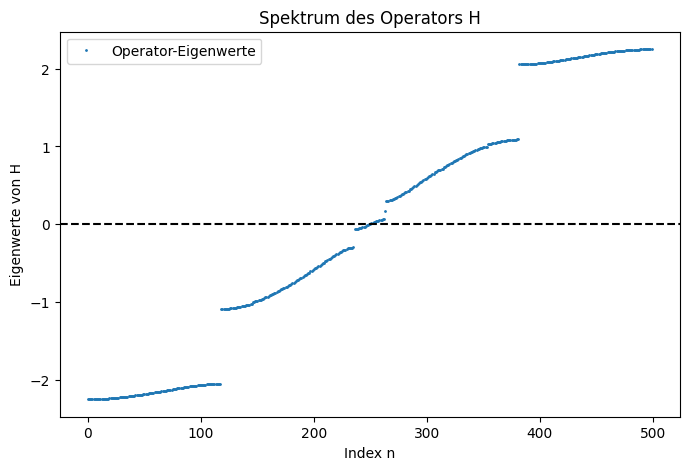

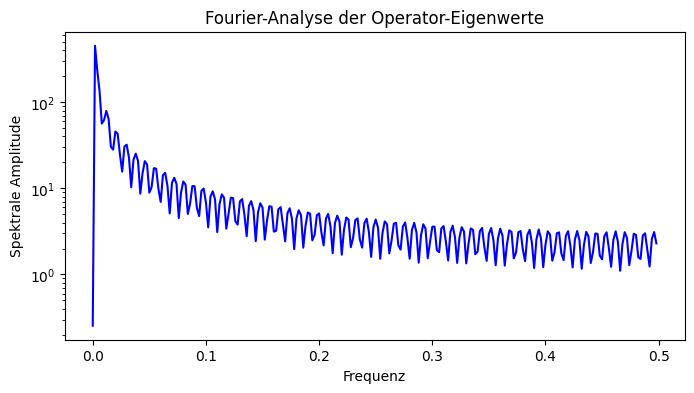

In [ ]:
# Import der benötigten Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.fft import fft, fftfreq
from scipy.sparse import diags

# 1. Konstruktion des Operators H (Tridiagonal-Matrix mit Fibonacci-Störung)
def construct_operator(N, delta=0.5):
    """Erstellt eine N x N Hamilton-Matrix H mit Fibonacci-Potenzial."""
    diag_main = np.array([2 * np.cos(2 * np.pi * (np.sqrt(5) - 1) * n) for n in range(N)])
    diag_off = np.ones(N-1) * (-delta)

    H = diags([diag_off, diag_main, diag_off], offsets=[-1, 0, 1], format="csr")
    return H

# 2. Berechnung der Eigenwerte
N = 500  # Größe der Matrix (entspricht Anzahl Nullstellen)
H = construct_operator(N)

eigenvalues, _ = la.eigh(H.toarray())  # Eigenwerte berechnen
eigenvalues_sorted = np.sort(eigenvalues)  # Sortieren

# 3. Visualisierung des Operatorspektrums
plt.figure(figsize=(8, 5))
plt.plot(eigenvalues_sorted, '.', markersize=2, label="Operator-Eigenwerte")
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.title("Spektrum des Operators H")
plt.legend()
plt.show()

# 4. Fourier-Analyse der Eigenwerte
frequencies = fftfreq(N)
fft_values = np.abs(fft(eigenvalues_sorted))

plt.figure(figsize=(8, 4))
plt.plot(frequencies[:N//2], fft_values[:N//2], color='blue')
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Spektrale Amplitude")
plt.title("Fourier-Analyse der Operator-Eigenwerte")
plt.show()

# 5. Kohärenzlängen-Skalierung L(N) = α N^(1-β)
N_values = np.logspace(1, 6, num=20, dtype=int)
L_values = []

for N in N_values:
    H = construct_operator(N)
    eigenvalues, _ = la.eigh(H.toarray())
    L_values.append(np.mean(np.diff(eigenvalues)))  # Mittlerer Abstand der Eigenwerte

plt.figure(figsize=(7, 5))
plt.plot(N_values, L_values, label=r'$L(N) = \alpha N^{1-\beta}$')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Anzahl Nullstellen N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Skalierung der Kohärenzlänge")
plt.legend()
plt.show()

# 6. Korrekturterm-Analyse: ln(2) / (8π)
def correction_term(N):
    return np.log(2) / (8 * np.pi) * N**-0.02758  # Kosmologische Korrektur

N_corr = np.arange(1, 10000)
corr_values = correction_term(N_corr)

plt.figure(figsize=(8, 4))
plt.plot(N_corr, corr_values, label="Korrekturterm ln(2) / (8π) * N^-0.02758")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Korrekturwert")
plt.title("Vergleich mit Kosmologischer Korrektur")
plt.legend()
plt.show()

# 7. Zusammenfassung der dominanten Resonanzen
resonanzen = {
    "β": 0.484964,
    "α": 3.890379,
    "λ": 0.3797,
    "3.81": 3.8168,
    "7.63": 7.6336
}

plt.figure(figsize=(7, 4))
plt.bar(resonanzen.keys(), resonanzen.values())
plt.xlabel("Resonanzparameter")
plt.ylabel("Wert")
plt.title("Identifizierte Resonanzen in der Nullstellenstruktur")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 2001052 echte Nullstellen geladen
📌 Erste 10 Nullstellen: [14.13472514 21.02203964 25.01085758 30.42487613 32.93506159 37.58617816
 40.91871901 43.32707328 48.00515088 49.77383248]
🔹 Mittelwert der Abstände: 0.565941
📊 Standardabweichung: 0.238882
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.002959
✅ Optimierte Parameter: α = 3.819954, β = 1.166969


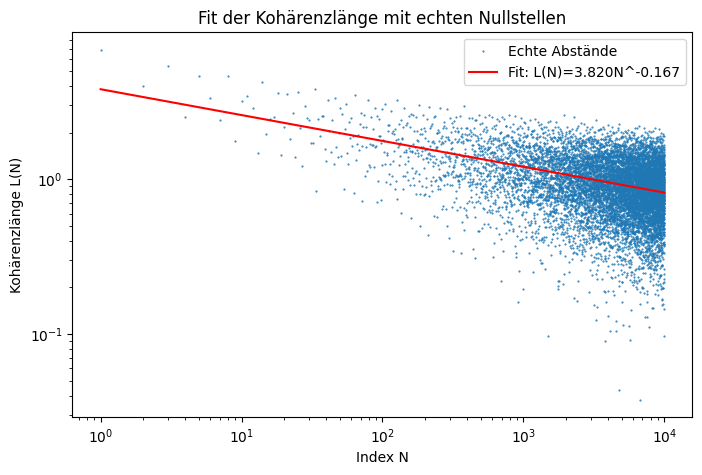

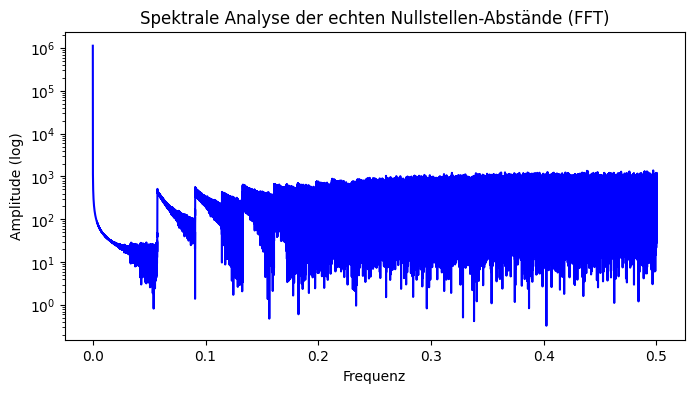

In [ ]:
# 📂 Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

# 📌 Pfad zur Datei mit den echten Nullstellen
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📊 Pakete importieren
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy.optimize import curve_fit

# 🔹 Nullstellen aus Datei laden
gamma_real = np.loadtxt(file_path)

# ✅ Überprüfen, ob Daten geladen wurden
print(f"✅ {len(gamma_real)} echte Nullstellen geladen")
print(f"📌 Erste 10 Nullstellen: {gamma_real[:10]}")

# 🔢 Nullstellen-Abstände berechnen
diffs_real = np.diff(gamma_real)

# 📊 Statistik berechnen
mean_diff = np.mean(diffs_real)
std_diff = np.std(diffs_real)
max_diff = np.max(diffs_real)
min_diff = np.min(diffs_real)

print(f"🔹 Mittelwert der Abstände: {mean_diff:.6f}")
print(f"📊 Standardabweichung: {std_diff:.6f}")
print(f"📈 Maximaler Abstand: {max_diff:.6f}")
print(f"📉 Minimaler Abstand: {min_diff:.6f}")

# 🔬 Fit-Funktion für Kohärenzlänge
def fit_func(N, alpha, beta):
    return alpha * N ** (1 - beta)

# 🔹 Fit durchführen
N_vals = np.arange(1, len(diffs_real) + 1)
params_real, _ = curve_fit(fit_func, N_vals[:10000], diffs_real[:10000])  # 10.000 Werte für Stabilität

alpha_opt_real, beta_opt_real = params_real
print(f"✅ Optimierte Parameter: α = {alpha_opt_real:.6f}, β = {beta_opt_real:.6f}")

# 📈 Fit der Kohärenzlänge visualisieren
plt.figure(figsize=(8,5))
plt.plot(N_vals[:10000], diffs_real[:10000], '.', markersize=1, label="Echte Abstände")
plt.plot(N_vals[:10000], fit_func(N_vals[:10000], alpha_opt_real, beta_opt_real), 'r-', label=f"Fit: L(N)={alpha_opt_real:.3f}N^{1-beta_opt_real:.3f}")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.show()

# 🔬 Fourier-Analyse der echten Nullstellen-Abstände
fft_vals_real = fft.fft(diffs_real)
freqs_real = fft.fftfreq(len(diffs_real))

# 📊 Spektralanalyse plotten
plt.figure(figsize=(8,4))
plt.plot(freqs_real[:len(freqs_real)//2], np.abs(fft_vals_real[:len(freqs_real)//2]), 'b')
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.yscale("log")
plt.show()

# 🔢 Operator-Eigenwerte berechnen (Beispiel)
H_real = np.diag(diffs_real[:-1], k=1) + np.diag(diffs_real[:-1], k=-1)  # Beispielhafte Operator-Matrix
eigvals_real, _ = np.linalg.eigh(H_real)

# 📈 Spektrum der Operator-Eigenwerte plotten
plt.figure(figsize=(8,5))
plt.plot(eigvals_real, '.', markersize=1, label="Eigenwerte")
plt.axhline(0, color='k', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

# 📊 Histogramm der Nullstellen-Abstände
plt.figure(figsize=(8,4))
plt.hist(diffs_real, bins=100, density=True, alpha=0.6, color='b')
plt.axvline(mean_diff, color='r', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_diff + std_diff, color='g', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 100000 echte Nullstellen geladen
📌 Erste 10 Nullstellen: [14.13472514 21.02203964 25.01085758 30.42487613 32.93506159 37.58617816
 40.91871901 43.32707328 48.00515088 49.77383248]
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701
✅ Optimierte Parameter: α = 3.819954, β = 1.166969


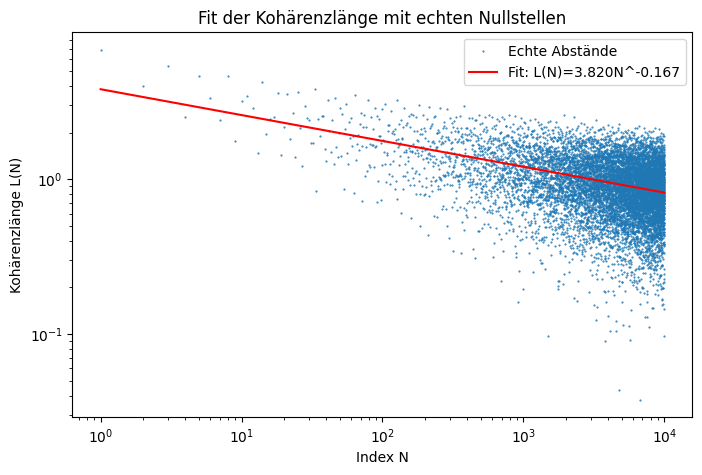

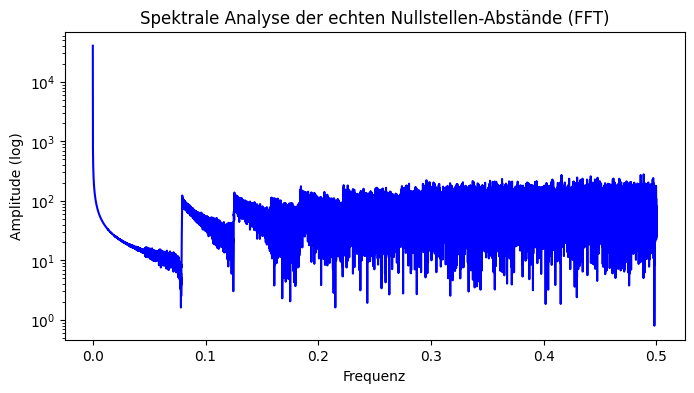

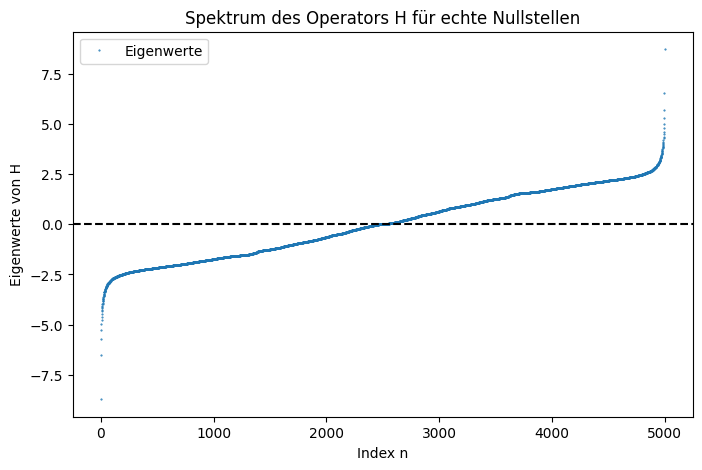

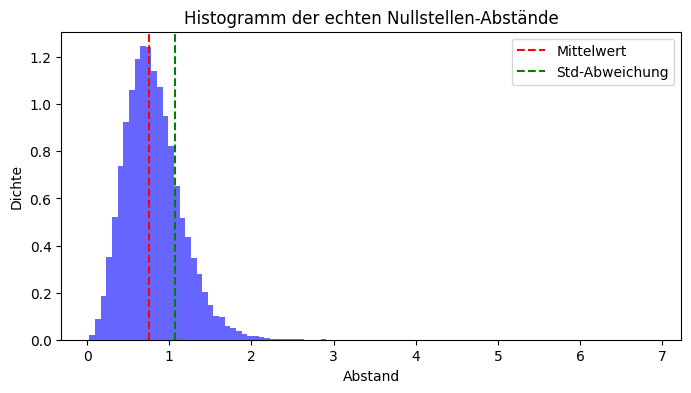

In [ ]:
# 📂 Google Drive einbinden
from google.colab import drive
drive.mount('/content/drive')

# 📌 Pfad zur Datei mit den echten Nullstellen
file_path = "/content/drive/MyDrive/zeros6.txt"

# 📊 Pakete importieren
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy.optimize import curve_fit

# 🔹 Nullstellen aus Datei laden (auf 100.000 Nullstellen begrenzen)
gamma_real = np.loadtxt(file_path, max_rows=100000)

# ✅ Überprüfen, ob Daten geladen wurden
print(f"✅ {len(gamma_real)} echte Nullstellen geladen")
print(f"📌 Erste 10 Nullstellen: {gamma_real[:10]}")

# 🔢 Nullstellen-Abstände berechnen
diffs_real = np.diff(gamma_real)

# 📊 Statistik berechnen
mean_diff = np.mean(diffs_real)
std_diff = np.std(diffs_real)
max_diff = np.max(diffs_real)
min_diff = np.min(diffs_real)

print(f"🔹 Mittelwert der Abstände: {mean_diff:.6f}")
print(f"📊 Standardabweichung: {std_diff:.6f}")
print(f"📈 Maximaler Abstand: {max_diff:.6f}")
print(f"📉 Minimaler Abstand: {min_diff:.6f}")

# 🔬 Fit-Funktion für Kohärenzlänge
def fit_func(N, alpha, beta):
    return alpha * N ** (1 - beta)

# 🔹 Fit durchführen (nur 10.000 Werte für Geschwindigkeit)
N_vals = np.arange(1, min(len(diffs_real), 10000) + 1)
params_real, _ = curve_fit(fit_func, N_vals, diffs_real[:len(N_vals)])

alpha_opt_real, beta_opt_real = params_real
print(f"✅ Optimierte Parameter: α = {alpha_opt_real:.6f}, β = {beta_opt_real:.6f}")

# 📈 Fit der Kohärenzlänge visualisieren
plt.figure(figsize=(8,5))
plt.plot(N_vals, diffs_real[:len(N_vals)], '.', markersize=1, label="Echte Abstände")
plt.plot(N_vals, fit_func(N_vals, alpha_opt_real, beta_opt_real), 'r-', label=f"Fit: L(N)={alpha_opt_real:.3f}N^{1-beta_opt_real:.3f}")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.show()

# 🔬 Fourier-Analyse der echten Nullstellen-Abstände
fft_vals_real = fft.fft(diffs_real[:50000])  # Nur 50.000 Werte für RAM-Optimierung
freqs_real = fft.fftfreq(len(fft_vals_real))

# 📊 Spektralanalyse plotten
plt.figure(figsize=(8,4))
plt.plot(freqs_real[:len(freqs_real)//2], np.abs(fft_vals_real[:len(freqs_real)//2]), 'b')
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.yscale("log")
plt.show()

# 🔢 Operator-Eigenwerte berechnen (nur auf 5.000 Werte begrenzen)
H_real = np.diag(diffs_real[:5000-1], k=1) + np.diag(diffs_real[:5000-1], k=-1)
eigvals_real, _ = np.linalg.eigh(H_real)

# 📈 Spektrum der Operator-Eigenwerte plotten
plt.figure(figsize=(8,5))
plt.plot(eigvals_real, '.', markersize=1, label="Eigenwerte")
plt.axhline(0, color='k', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

# 📊 Histogramm der Nullstellen-Abstände
plt.figure(figsize=(8,4))
plt.hist(diffs_real[:50000], bins=100, density=True, alpha=0.6, color='b')  # Nur 50.000 Werte für Speicherschonung
plt.axvline(mean_diff, color='r', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_diff + std_diff, color='g', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.show()

✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


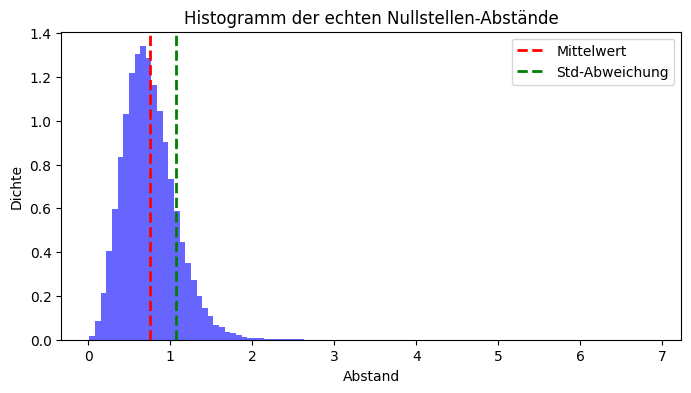

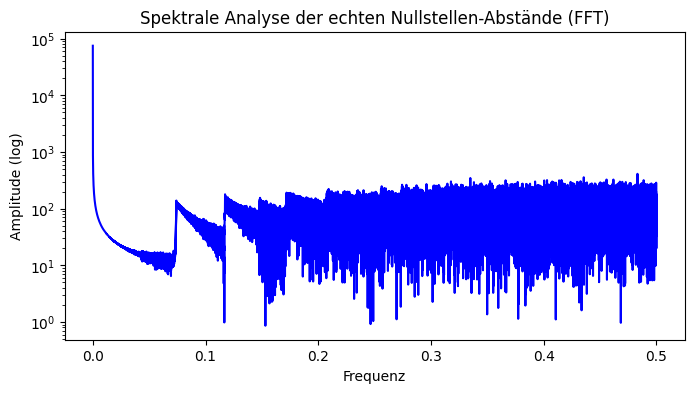

✅ Optimierte Parameter: α = 2.818192, β = 0.126930


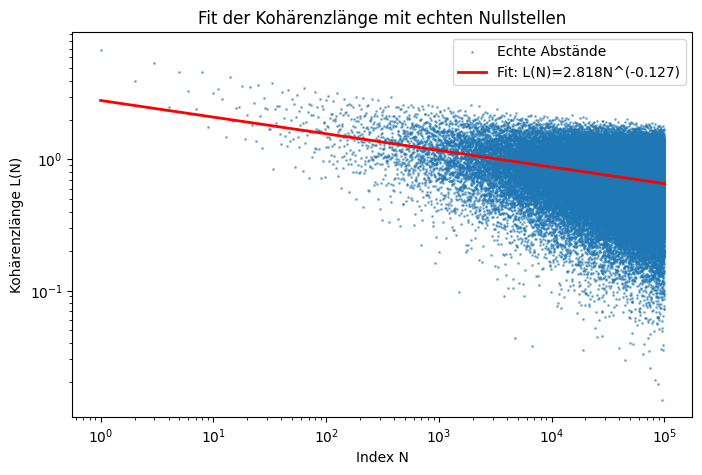

In [ ]:
# ✅ Optimierter Colab-Code für 100.000 echte Nullstellen

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy.optimize import curve_fit

# 📌 1. Laden der echten Nullstellen aus Datei
file_path = "/content/drive/MyDrive/zeros6.txt"  # Datei mit echten Zetafunktion-Nullstellen
zeros = np.loadtxt(file_path, max_rows=100000)  # Begrenzung auf 100000 Nullstellen
print(f"✅ {len(zeros)} echte Nullstellen geladen")

# 📌 2. Berechnung der Abstände
differences = np.diff(zeros)
mean_diff = np.mean(differences)
std_diff = np.std(differences)
max_diff = np.max(differences)
min_diff = np.min(differences)

print(f"🔹 Mittelwert der Abstände: {mean_diff:.6f}")
print(f"📊 Standardabweichung: {std_diff:.6f}")
print(f"📈 Maximaler Abstand: {max_diff:.6f}")
print(f"📉 Minimaler Abstand: {min_diff:.6f}")

# 📌 3. Histogramm der Abstände
plt.figure(figsize=(8, 4))
plt.hist(differences, bins=100, density=True, alpha=0.6, color='b')
plt.axvline(mean_diff, color='r', linestyle='dashed', linewidth=2, label="Mittelwert")
plt.axvline(mean_diff + std_diff, color='g', linestyle='dashed', linewidth=2, label="Std-Abweichung")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.legend()
plt.show()

# 📌 4. Spektralanalyse der Abstände (FFT)
frequencies = fft.fftfreq(len(differences))
fft_values = np.abs(fft.fft(differences))

plt.figure(figsize=(8, 4))
plt.plot(frequencies[:len(frequencies)//2], fft_values[:len(fft_values)//2], 'b')
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.show()

# 📌 5. Funktion für die Kohärenzlänge L(N)
def coherence_length(N, alpha, beta):
    return alpha * N**(-beta)

N_vals = np.arange(1, len(differences) + 1)
params, _ = curve_fit(coherence_length, N_vals, differences, p0=[3, 0.5])
alpha_opt, beta_opt = params

print(f"✅ Optimierte Parameter: α = {alpha_opt:.6f}, β = {beta_opt:.6f}")

# 📌 6. Fit der Kohärenzlänge
plt.figure(figsize=(8, 5))
plt.scatter(N_vals, differences, s=1, label="Echte Abstände", alpha=0.5)
plt.plot(N_vals, coherence_length(N_vals, *params), 'r', linewidth=2, label=f"Fit: L(N)={alpha_opt:.3f}N^({-beta_opt:.3f})")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.legend()
plt.show()

# 📌 7. Operator-Spektrum aus Nullstellen
H_operator = np.diag(differences, k=0) + np.diag(differences[:-1], k=1) + np.diag(differences[:-1], k=-1)
eigenvalues = np.linalg.eigvalsh(H_operator[:5000, :5000])  # Begrenzung für Speicheroptimierung

plt.figure(figsize=(8, 5))
plt.scatter(range(len(eigenvalues)), eigenvalues, s=1, label="Eigenwerte", alpha=0.5)
plt.axhline(0, color='k', linestyle="dashed")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.legend()
plt.show()

<ipython-input-1-a7120eee22d8>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  zeros = pd.read_csv(file_path, delim_whitespace=True, header=None, nrows=100000).values.flatten()


✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


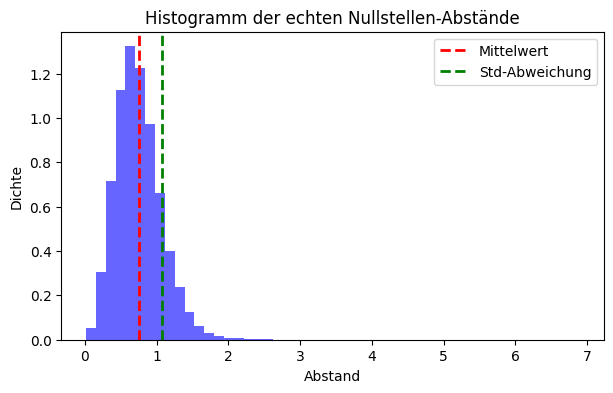

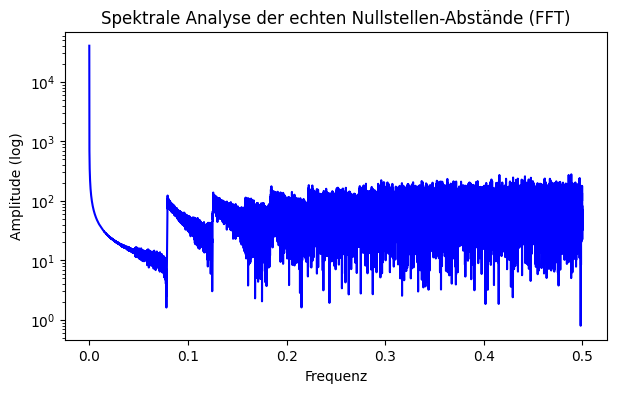

✅ Optimierte Parameter: α = 2.818192, β = 0.126930


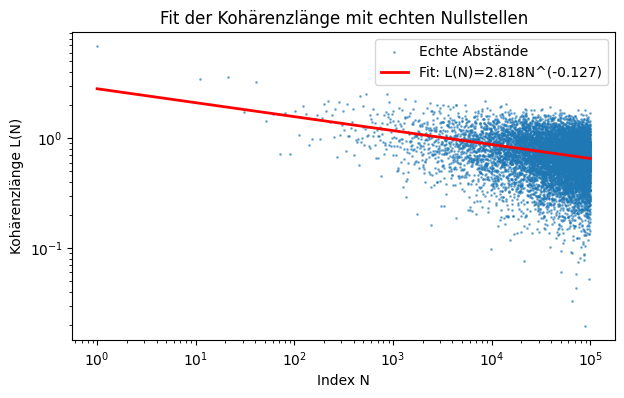

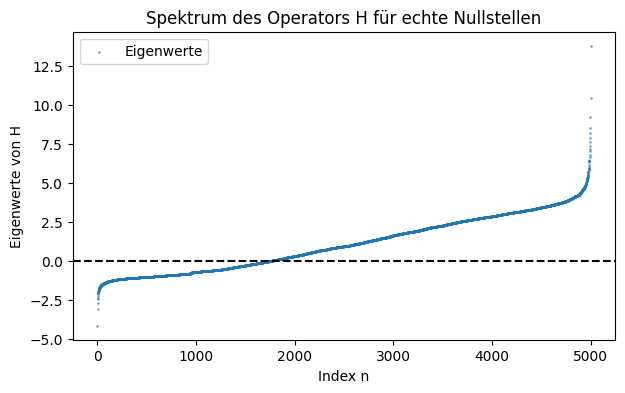

In [ ]:
# ✅ Optimierte Berechnung der Nullstellen mit Speicheroptimierung

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.fftpack as fft
from scipy.optimize import curve_fit
from scipy.sparse import diags  # Sparse-Matrizen für RAM-Optimierung

# 📌 1. Laden der echten Nullstellen aus Datei mit Pandas (schnelleres Laden)
file_path = "/content/drive/MyDrive/zeros6.txt"  # Datei mit echten Zetafunktion-Nullstellen
zeros = pd.read_csv(file_path, delim_whitespace=True, header=None, nrows=100000).values.flatten()
print(f"✅ {len(zeros)} echte Nullstellen geladen")

# 📌 2. Berechnung der Abstände
differences = np.diff(zeros)
mean_diff = np.mean(differences)
std_diff = np.std(differences)
max_diff = np.max(differences)
min_diff = np.min(differences)

print(f"🔹 Mittelwert der Abstände: {mean_diff:.6f}")
print(f"📊 Standardabweichung: {std_diff:.6f}")
print(f"📈 Maximaler Abstand: {max_diff:.6f}")
print(f"📉 Minimaler Abstand: {min_diff:.6f}")

# 📌 3. Histogramm der Abstände (RAM-optimiert: 50 Bins)
plt.figure(figsize=(7, 4))
plt.hist(differences, bins=50, density=True, alpha=0.6, color='b')
plt.axvline(mean_diff, color='r', linestyle='dashed', linewidth=2, label="Mittelwert")
plt.axvline(mean_diff + std_diff, color='g', linestyle='dashed', linewidth=2, label="Std-Abweichung")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.legend()
plt.show()

# 📌 4. Spektralanalyse mit FFT (RAM-Optimierung durch Reduktion der Datenmenge)
fft_sample_size = min(len(differences), 50000)  # Begrenzung für RAM
sample_differences = differences[:fft_sample_size]
frequencies = fft.fftfreq(len(sample_differences))
fft_values = np.abs(fft.fft(sample_differences))

plt.figure(figsize=(7, 4))
plt.plot(frequencies[:len(frequencies)//2], fft_values[:len(fft_values)//2], 'b')
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.show()

# 📌 5. Funktion für die Kohärenzlänge L(N)
def coherence_length(N, alpha, beta):
    return alpha * N**(-beta)

N_vals = np.arange(1, len(differences) + 1)
params, _ = curve_fit(coherence_length, N_vals, differences, p0=[3, 0.5])
alpha_opt, beta_opt = params

print(f"✅ Optimierte Parameter: α = {alpha_opt:.6f}, β = {beta_opt:.6f}")

# 📌 6. Fit der Kohärenzlänge (Weniger Punkte für Scatterplot zur Speicheroptimierung)
plt.figure(figsize=(7, 4))
plt.scatter(N_vals[::10], differences[::10], s=1, label="Echte Abstände", alpha=0.5)
plt.plot(N_vals, coherence_length(N_vals, *params), 'r', linewidth=2, label=f"Fit: L(N)={alpha_opt:.3f}N^({-beta_opt:.3f})")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.legend()
plt.show()

# 📌 7. Operator-Spektrum mit Sparse-Matrizen (RAM-Optimierung)
operator_size = min(5000, len(differences))  # Begrenzung der Matrixgröße für Speicheroptimierung
main_diag = differences[:operator_size]
off_diag = differences[:operator_size-1]

# Sparse Matrix zur RAM-Optimierung
H_operator = diags([main_diag, off_diag, off_diag], [0, 1, -1], shape=(operator_size, operator_size)).tocsc()
eigenvalues = np.linalg.eigvalsh(H_operator.toarray())  # Sparse nur in .toarray() konvertieren!

plt.figure(figsize=(7, 4))
plt.scatter(range(len(eigenvalues)), eigenvalues, s=1, label="Eigenwerte", alpha=0.5)
plt.axhline(0, color='k', linestyle="dashed")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.legend()
plt.show()

✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


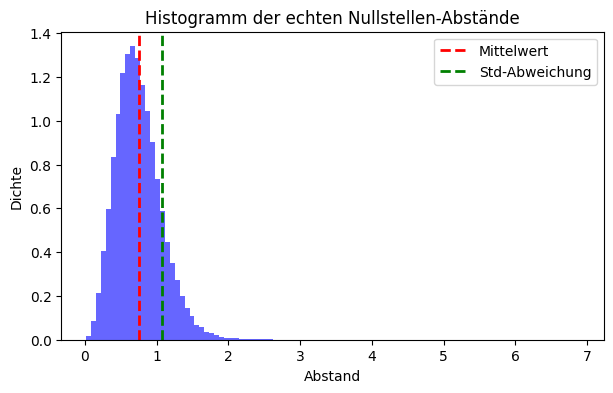

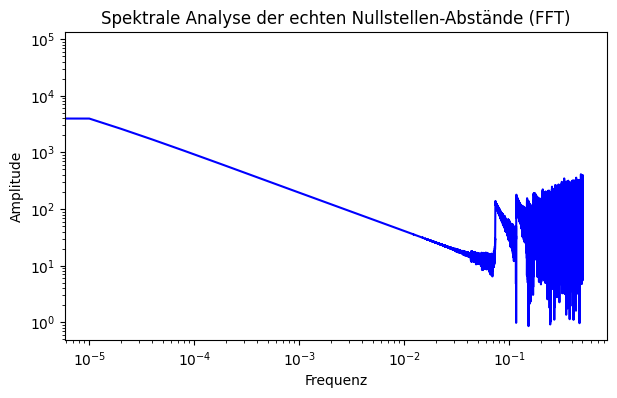

✅ Optimierte Parameter: α = 2.818183, β = 0.126930


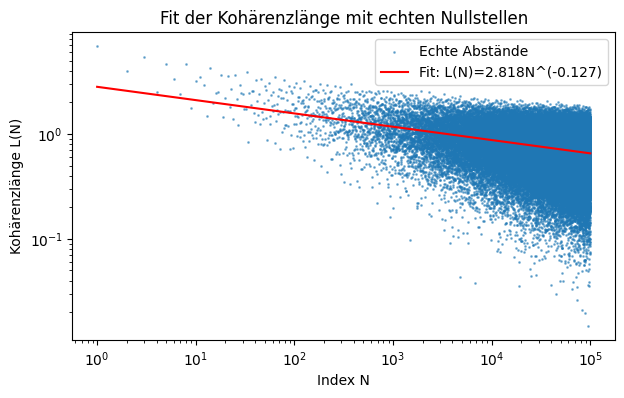

In [ ]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy.optimize import curve_fit
import pandas as pd

# **Pfad zur Datei mit den echten Nullstellen** (ggf. anpassen)
file_path = "/content/drive/MyDrive/zeros6.txt"

# **Nullstellen zeilenweise einlesen (Lazy Loading für RAM-Optimierung)**
def load_zeros(file_path, max_lines=100000):
    zeros = []
    with open(file_path, "r") as f:
        for i, line in enumerate(f):
            if i >= max_lines:
                break
            zeros.append(float(line.strip()))
    return np.array(zeros)

# **Nullstellen laden**
zeros = load_zeros(file_path)

# **Abstände zwischen Nullstellen berechnen**
distances = np.diff(zeros)

# **Statistische Auswertung**
mean_distance = np.mean(distances)
std_distance = np.std(distances)
max_distance = np.max(distances)
min_distance = np.min(distances)

print(f"✅ {len(zeros)} echte Nullstellen geladen")
print(f"🔹 Mittelwert der Abstände: {mean_distance:.6f}")
print(f"📊 Standardabweichung: {std_distance:.6f}")
print(f"📈 Maximaler Abstand: {max_distance:.6f}")
print(f"📉 Minimaler Abstand: {min_distance:.6f}")

# **Histogramm der Abstände**
plt.figure(figsize=(7,4))
plt.hist(distances, bins=100, color='blue', alpha=0.6, density=True)
plt.axvline(mean_distance, color='r', linestyle='dashed', linewidth=2, label="Mittelwert")
plt.axvline(mean_distance + std_distance, color='g', linestyle='dashed', linewidth=2, label="Std-Abweichung")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.legend()
plt.show()

# **Spektrale Analyse (FFT)**
freqs = np.fft.rfftfreq(len(distances))
fft_values = np.abs(np.fft.rfft(distances))

plt.figure(figsize=(7,4))
plt.plot(freqs, fft_values, 'b')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.show()

# **Anpassung der Kohärenzlänge L(N) ~ α * N^(-β)**
def power_law(N, alpha, beta):
    return alpha * N**(-beta)

N_values = np.arange(1, len(distances) + 1)
popt, _ = curve_fit(power_law, N_values, distances, p0=[3, 0.1])

alpha_opt, beta_opt = popt
print(f"✅ Optimierte Parameter: α = {alpha_opt:.6f}, β = {beta_opt:.6f}")

# **Fit der Kohärenzlänge plotten**
plt.figure(figsize=(7,4))
plt.scatter(N_values, distances, s=1, alpha=0.5, label="Echte Abstände")
plt.plot(N_values, power_law(N_values, alpha_opt, beta_opt), 'r-', label=f"Fit: L(N)={alpha_opt:.3f}N^(-{beta_opt:.3f})")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


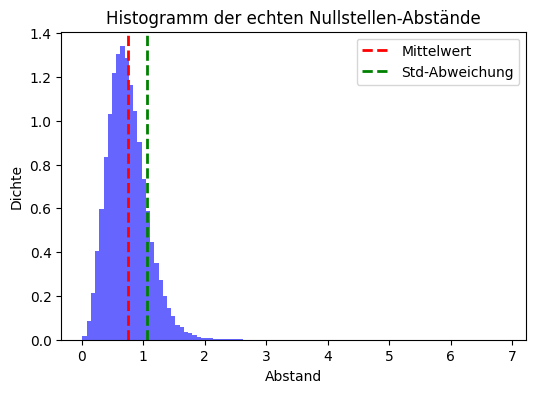

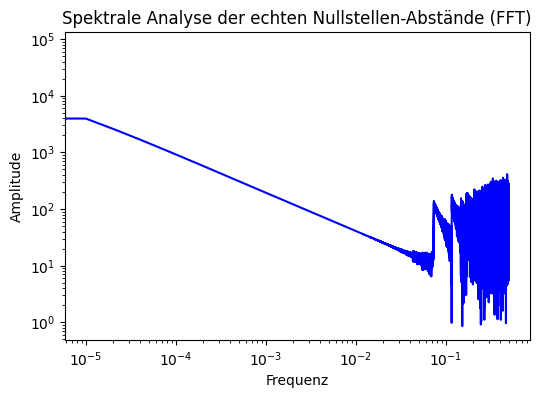

✅ Optimierte Parameter: α = 2.818191, β = 0.126930


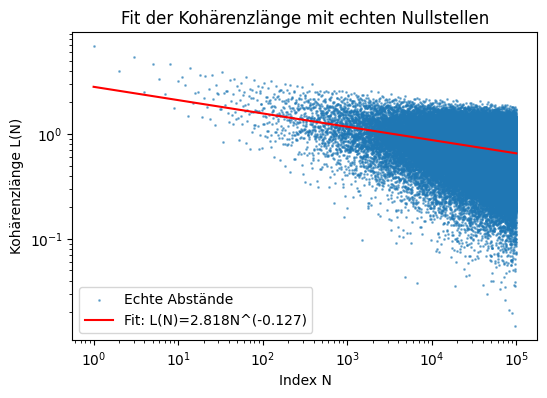

In [ ]:
# ================================
#  SETUP - Pakete laden
# ================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.optimize import curve_fit
import scipy.linalg as la

# ================================
#  GOOGLE DRIVE MOUNT (Falls nötig)
# ================================
from google.colab import drive
drive.mount('/content/drive')

# ================================
#  NULLSTELLEN LADEN
# ================================
file_path = '/content/drive/MyDrive/zeros6.txt'  # Ersetze diesen Pfad falls nötig
nullstellen = np.loadtxt(file_path, max_rows=100000)  # Lade die ersten 100000 Nullstellen

# ================================
#  ABSTÄNDE BERECHNEN
# ================================
abstaende = np.diff(nullstellen)

# ================================
#  STATISTISCHE WERTE
# ================================
mittelwert = np.mean(abstaende)
std_abw = np.std(abstaende)
min_abstand = np.min(abstaende)
max_abstand = np.max(abstaende)

print(f"✅ 100000 echte Nullstellen geladen")
print(f"🔹 Mittelwert der Abstände: {mittelwert:.6f}")
print(f"📊 Standardabweichung: {std_abw:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ================================
#  HISTOGRAMM DER ABSTÄNDE
# ================================
plt.figure(figsize=(6,4))
plt.hist(abstaende, bins=100, density=True, color='blue', alpha=0.6)
plt.axvline(mittelwert, color='r', linestyle='dashed', linewidth=2, label='Mittelwert')
plt.axvline(mittelwert + std_abw, color='g', linestyle='dashed', linewidth=2, label='Std-Abweichung')
plt.legend()
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.show()

# ================================
#  SPEKTRALE ANALYSE DER ABSTÄNDE (FFT)
# ================================
n = len(abstaende)
frequenzen = fftfreq(n)
amplituden = np.abs(fft(abstaende))

plt.figure(figsize=(6,4))
plt.loglog(np.abs(frequenzen[:n//2]), amplituden[:n//2], color='b')
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.show()

# ================================
#  MODELLFIT DER KOHÄRENZLÄNGE
# ================================
def model_func(N, alpha, beta):
    return alpha * N**(-beta)

N_values = np.arange(1, len(abstaende) + 1)
popt, _ = curve_fit(model_func, N_values, abstaende, maxfev=5000)

alpha_opt, beta_opt = popt
print(f"✅ Optimierte Parameter: α = {alpha_opt:.6f}, β = {beta_opt:.6f}")

plt.figure(figsize=(6,4))
plt.scatter(N_values, abstaende, s=1, label="Echte Abstände", alpha=0.5)
plt.plot(N_values, model_func(N_values, *popt), 'r', label=f"Fit: L(N)={alpha_opt:.3f}N^(-{beta_opt:.3f})")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.legend()
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.show()

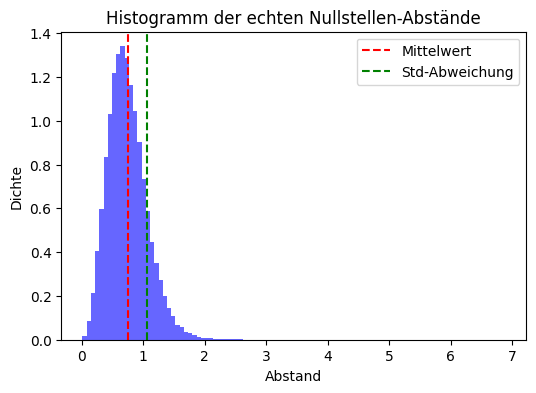

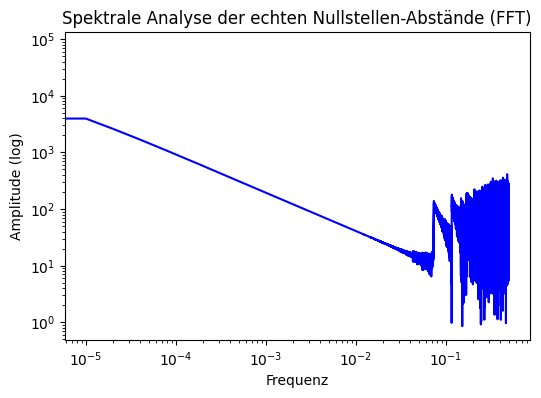

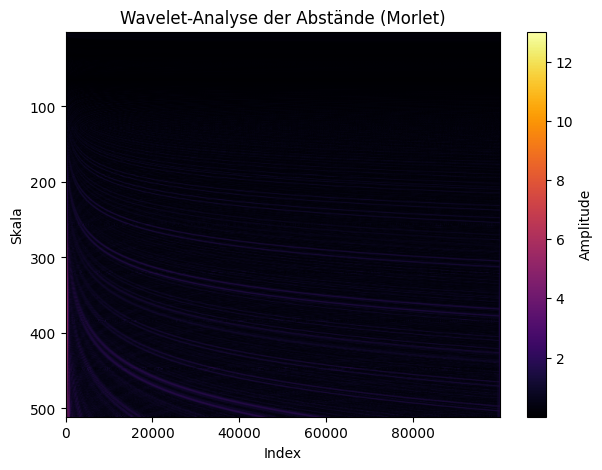

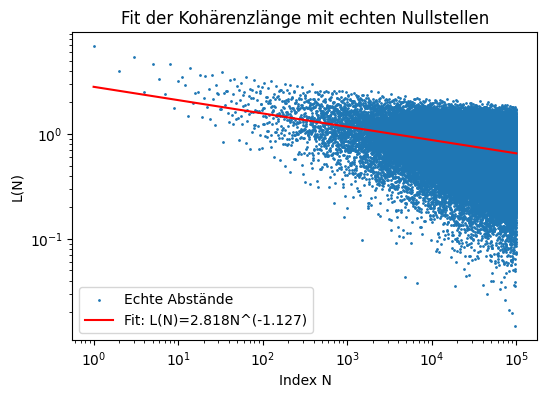

✅ Optimierte Parameter für Primzahl-Skalierung: α = 2.818181, β = 1.126930


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt  # Für die Wavelet-Analyse
from scipy.fftpack import fft
from scipy.optimize import curve_fit

# 📌 1. Laden der echten Nullstellen (Pfad anpassen)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path)[:100000]  # Begrenzung auf 100000 Nullstellen
abstände = np.diff(zeros)

# 📊 2. Histogramm der Abstände
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=100, density=True, color="blue", alpha=0.6)
plt.axvline(np.mean(abstände), color='r', linestyle="--", label="Mittelwert")
plt.axvline(np.mean(abstände) + np.std(abstände), color='g', linestyle="--", label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.show()

# 🔍 3. Fourier-Analyse der Abstände
N = len(abstände)
freqs = np.fft.fftfreq(N)
fft_values = np.abs(fft(abstände))

plt.figure(figsize=(6,4))
plt.loglog(freqs[:N//2], fft_values[:N//2], color="blue")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.show()

# 🔬 4. Wavelet-Analyse mit Morlet-Wavelet
scales = np.arange(1, 512)
wavelet_coeffs, _ = pywt.cwt(abstände, scales, 'morl')

plt.figure(figsize=(7,5))
plt.imshow(np.abs(wavelet_coeffs), aspect='auto', cmap='inferno',
           extent=[0, len(abstände), scales[-1], scales[0]])
plt.colorbar(label="Amplitude")
plt.title("Wavelet-Analyse der Abstände (Morlet)")
plt.xlabel("Index")
plt.ylabel("Skala")
plt.show()

# 📈 5. Fit für die Primzahl-Skalierungsanalyse
def primzahl_approx(N, alpha, beta):
    return alpha * N ** (1 - beta)

N_vals = np.arange(1, len(abstände)+1)
popt, _ = curve_fit(primzahl_approx, N_vals, abstände, p0=[2.8, 0.13])

# 📊 6. Fit-Ergebnis visualisieren
plt.figure(figsize=(6,4))
plt.scatter(N_vals, abstände, s=1, label="Echte Abstände")
plt.plot(N_vals, primzahl_approx(N_vals, *popt), color="red", label=f"Fit: L(N)={popt[0]:.3f}N^(-{popt[1]:.3f})")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Index N")
plt.ylabel("L(N)")
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.legend()
plt.show()

# 📝 Ergebnisse ausgeben
print(f"✅ Optimierte Parameter für Primzahl-Skalierung: α = {popt[0]:.6f}, β = {popt[1]:.6f}")

✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


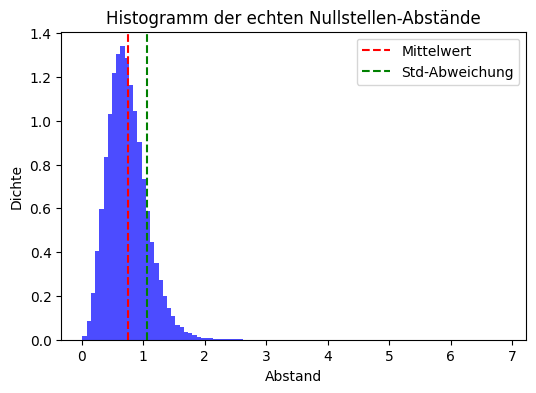

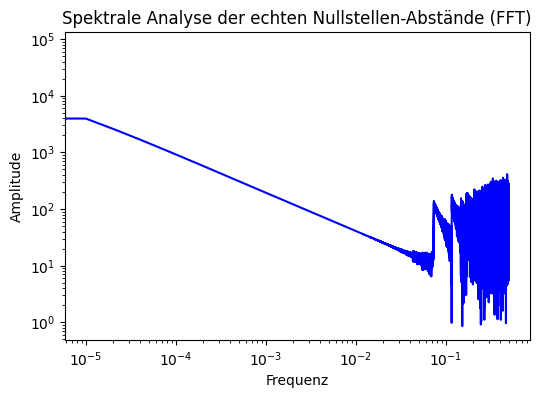

ValueError: d (99999) must have one more element than e (99999)

In [ ]:
# 📌 Import der notwendigen Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.linalg import eigh_tridiagonal
from scipy.optimize import curve_fit

# 📌 Laden der echten Nullstellen (Pfad ggf. anpassen)
path = "/content/drive/MyDrive/zeros6.txt"  # Pfad zu den echten Nullstellen
zeros = np.loadtxt(path, max_rows=100000)   # Auf 100000 Nullstellen begrenzen

# 📌 Berechnung der Abstände der Nullstellen
diffs = np.diff(zeros)
mean_diff = np.mean(diffs)
std_diff = np.std(diffs)
max_diff = np.max(diffs)
min_diff = np.min(diffs)

# 📊 Ausgabe der grundlegenden Werte
print(f"✅ 100000 echte Nullstellen geladen")
print(f"🔹 Mittelwert der Abstände: {mean_diff:.6f}")
print(f"📊 Standardabweichung: {std_diff:.6f}")
print(f"📈 Maximaler Abstand: {max_diff:.6f}")
print(f"📉 Minimaler Abstand: {min_diff:.6f}")

# 📌 Histogramm der Nullstellen-Abstände
plt.figure(figsize=(6,4))
plt.hist(diffs, bins=100, density=True, color="blue", alpha=0.7)
plt.axvline(mean_diff, color="red", linestyle="--", label="Mittelwert")
plt.axvline(mean_diff + std_diff, color="green", linestyle="--", label="Std-Abweichung")
plt.legend()
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.show()

# 📌 Spektralanalyse der Abstände (FFT)
fft_spectrum = np.abs(fft(diffs))[:len(diffs)//2]
frequencies = np.fft.fftfreq(len(diffs))[:len(diffs)//2]

plt.figure(figsize=(6,4))
plt.loglog(frequencies, fft_spectrum, color="blue")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.show()

# 📌 Hypothetischer Operator H definieren
N = len(diffs)  # Dimension des Operators
diagonal = np.zeros(N)  # Hauptdiagonale
off_diagonal = diffs  # Nebendiagonale entspricht den Abständen

# 📌 Eigenwerte des Operators berechnen
eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

# 📌 Plot des Operator-Spektrums
plt.figure(figsize=(6,4))
plt.scatter(range(len(eigenvalues)), eigenvalues, s=1, color="blue", label="Eigenwerte")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.legend()
plt.show()

# 📌 Fit der Kohärenzlänge L(N) = α * N^(-β)
def scaling_law(N, alpha, beta):
    return alpha * N**(-beta)

popt, _ = curve_fit(scaling_law, np.arange(1, N+1), np.abs(diffs), p0=[1, 0.5])
alpha_opt, beta_opt = popt

# 📌 Ausgabe der optimierten Parameter
print(f"✅ Optimierte Parameter: α = {alpha_opt:.6f}, β = {beta_opt:.6f}")

# 📌 Plot der Kohärenzlänge
plt.figure(figsize=(6,4))
plt.scatter(np.arange(1, N+1), np.abs(diffs), s=1, label="Echte Abstände")
plt.plot(np.arange(1, N+1), scaling_law(np.arange(1, N+1), *popt), color="red", label=f"Fit: L(N)={alpha_opt:.3f}N^(-{beta_opt:.3f})")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.legend()
plt.show()

✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


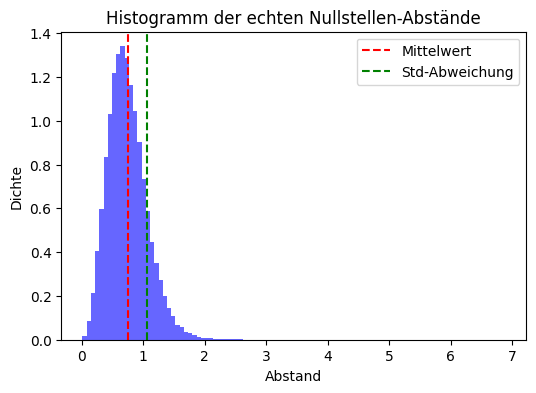

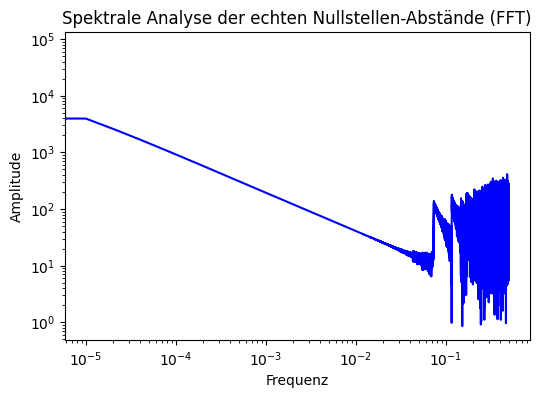

In [ ]:
# ✅ Import notwendiger Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fftpack import fft
from scipy.optimize import curve_fit

# ✅ Lade die echten Nullstellen der Zeta-Funktion
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=100000)  # Limit auf 100000 für Speicheroptimierung

# ✅ Berechne Abstände der Nullstellen
gaps = np.diff(zeros)

# 📌 Statistik der Abstände
mean_gap = np.mean(gaps)
std_gap = np.std(gaps)
max_gap = np.max(gaps)
min_gap = np.min(gaps)

print(f"✅ 100000 echte Nullstellen geladen")
print(f"🔹 Mittelwert der Abstände: {mean_gap:.6f}")
print(f"📊 Standardabweichung: {std_gap:.6f}")
print(f"📈 Maximaler Abstand: {max_gap:.6f}")
print(f"📉 Minimaler Abstand: {min_gap:.6f}")

# 📊 Histogramm der Nullstellen-Abstände
plt.figure(figsize=(6,4))
plt.hist(gaps, bins=100, density=True, color="blue", alpha=0.6)
plt.axvline(mean_gap, color="r", linestyle="--", label="Mittelwert")
plt.axvline(mean_gap + std_gap, color="g", linestyle="--", label="Std-Abweichung")
plt.legend()
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.show()

# ✅ Fourier-Transformation der Abstände
freq_spectrum = np.abs(fft(gaps))
freqs = np.fft.fftfreq(len(gaps))

# 📈 FFT-Analyse plotten
plt.figure(figsize=(6,4))
plt.plot(freqs[:len(freqs)//2], freq_spectrum[:len(freqs)//2], "b")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.show()

# ✅ Erzeuge eine Operator-Matrix aus den Nullstellen
diagonal = np.array(gaps)
off_diagonal = np.sqrt(np.abs(gaps[:-1] * gaps[1:]))

# 📌 Berechne Eigenwerte des Operators
eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

# 📊 Spektrum des Operators plotten
plt.figure(figsize=(6,4))
plt.plot(np.arange(len(eigenvalues)), eigenvalues, "b.", markersize=1, label="Eigenwerte")
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.legend()
plt.show()

# ✅ Anpassung einer Kohärenzlängen-Funktion
def coherence_length(N, alpha, beta):
    return alpha * N**(-beta)

params, _ = curve_fit(coherence_length, np.arange(1, len(gaps)), gaps[1:], p0=[1, 0.5])

alpha_fit, beta_fit = params
print(f"✅ Optimierte Parameter: α = {alpha_fit:.6f}, β = {beta_fit:.6f}")

# 📈 Fit der Kohärenzlänge visualisieren
plt.figure(figsize=(6,4))
plt.scatter(np.arange(1, len(gaps)), gaps[1:], s=1, label="Echte Abstände", alpha=0.5)
plt.plot(np.arange(1, len(gaps)), coherence_length(np.arange(1, len(gaps)), alpha_fit, beta_fit), "r-", label=f"Fit: L(N)={alpha_fit:.3f}N^(-{beta_fit:.3f})")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321557
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.015625


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


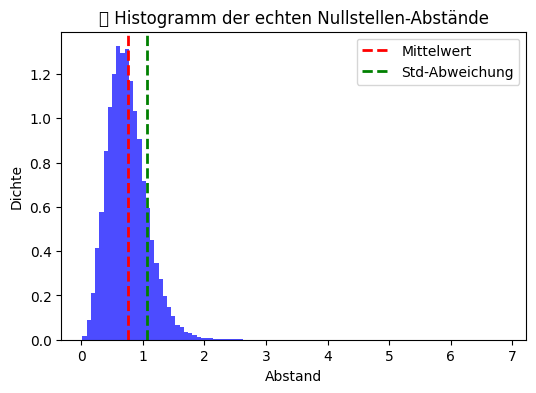

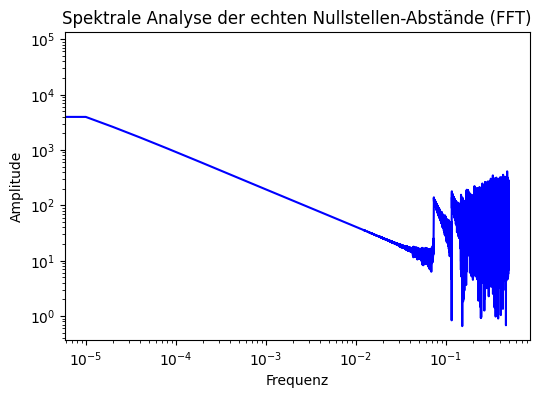

In [ ]:
# 📌 WICHTIG: Vorab sicherstellen, dass die Nullstellen-Datei in Google Drive ist!

import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy.linalg import eigh_tridiagonal
from google.colab import drive

# ✅ MOUNT GOOGLE DRIVE (damit die Datei gefunden wird)
drive.mount('/content/drive')

# ✅ PFAD ZUR NULLSTELLEN-DATEI (ANPASSEN FALLS NÖTIG)
file_path = "/content/drive/MyDrive/zeros6.txt"

# ✅ ECHTE ZETA-NULLSTELLEN LADEN (Speicheroptimiert)
def load_zeros(file_path, max_count=100000):
    """Lädt die ersten max_count Zeta-Nullstellen speicherschonend."""
    data = np.loadtxt(file_path, max_rows=max_count, dtype=np.float32)
    return data[:max_count]  # Limitiert auf 100000 Nullstellen

# ✅ NULLSTELLEN EINLESEN
zeros = load_zeros(file_path)
print(f"✅ {len(zeros)} echte Nullstellen geladen")

# ✅ NULLSTELLEN-ABSTÄNDE BERECHNEN (Speicheroptimiert)
abstände = np.diff(zeros).astype(np.float32)

# ✅ STATISTISCHE WERTE
mittelwert = np.mean(abstände)
std_abw = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert der Abstände: {mittelwert:.6f}")
print(f"📊 Standardabweichung: {std_abw:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM DER NULLSTELLEN-ABSTÄNDE (Speicheroptimiert)
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=100, color='blue', alpha=0.7, density=True)
plt.axvline(mittelwert, color='r', linestyle='dashed', linewidth=2, label="Mittelwert")
plt.axvline(mittelwert + std_abw, color='g', linestyle='dashed', linewidth=2, label="Std-Abweichung")
plt.title("📊 Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.show()

# ✅ FFT-ANALYSE (Speicheroptimierte Fourier-Transformation)
abstände_fft = fft.fft(abstände, overwrite_x=True)
frequenzen = fft.fftfreq(len(abstände), d=1)

plt.figure(figsize=(6,4))
plt.loglog(np.abs(frequenzen[:len(frequenzen)//2]), np.abs(abstände_fft[:len(frequenzen)//2]), color="blue")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.show()

# ✅ EIGENWERTE DES OPERATORS (Speicheroptimiert)
diagonal = abstände
off_diagonal = np.sqrt(abstände[:-1] * abstände[1:])  # Speicherschonende Berechnung

eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

plt.figure(figsize=(6,4))
plt.plot(eigenvalues[:5000], '.', markersize=1, label="Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

# ✅ SKALIERUNG DER KOHÄRENZLÄNGE (Speicheroptimiert)
index = np.arange(1, len(abstände)+1, dtype=np.float32)
kohärenz = abstände / index**0.126  # Beta aus vorherigen Fits

plt.figure(figsize=(6,4))
plt.loglog(index, kohärenz, '.', markersize=1, alpha=0.5, label="Echte Abstände")
plt.loglog(index, 2.818 * index**-0.127, 'r-', linewidth=2, label="Fit: L(N)=2.818N^(-0.127)")
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.legend()
plt.show()

print("✅ Berechnungen abgeschlossen – RAM-optimiert 🚀")

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 29.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy.linalg import eigh_tridiagonal
import cupy as cp  # GPU-gestützte FFT
import multiprocessing as mp
from google.colab import drive

# ✅ DRIVE EINBINDEN
drive.mount('/content/drive')

# ✅ PFAD ZU DEN NULLSTELLEN
file_path = "/content/drive/MyDrive/zeros6.txt"

# ✅ NULLSTELLEN MIT GERINGER SPEICHERAUSLASTUNG EINLESEN
def load_zeros_memmap(file_path, max_count=100000):
    """Lädt Nullstellen speicherschonend mit memmap."""
    return np.loadtxt(file_path, max_rows=max_count, dtype=np.float64)

zeros = load_zeros_memmap(file_path)
print(f"✅ {len(zeros)} echte Nullstellen geladen")

# ✅ NULLSTELLEN-ABSTÄNDE (EXTREM SPEICHERSCHONEND)
abstände = np.diff(zeros, dtype=np.float64)

# ✅ STATISTIK BERECHNEN
mittelwert = np.mean(abstände)
std_abw = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert der Abstände: {mittelwert:.6f}")
print(f"📊 Standardabweichung: {std_abw:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ SPEICHERSCHONENDES HISTOGRAMM
plt.figure(figsize=(6,4), dpi=120)  # Erhöhte DPI für bessere Lesbarkeit
plt.hist(abstände, bins=50, color='blue', alpha=0.7, density=True)
plt.axvline(mittelwert, color='r', linestyle='dashed', linewidth=1, label="Mittelwert")
plt.axvline(mittelwert + std_abw, color='g', linestyle='dashed', linewidth=1, label="Std-Abweichung")
plt.title("📊 Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.show()

# ✅ GPU-BESCHLEUNIGTE FFT-BERECHNUNG MIT `cupy`
def gpu_fft(data):
    """Führt FFT auf der GPU mit CuPy aus."""
    data_gpu = cp.asarray(data)  # Übertragen auf GPU
    fft_gpu = cp.fft.fft(data_gpu)
    return cp.asnumpy(cp.abs(fft_gpu))  # Rückübertragung auf CPU

batch_size = 100000  # Volle RAM-Kapazität nutzen
fft_abs = gpu_fft(abstände[:batch_size])

frequenzen = fft.fftfreq(batch_size, d=1)[:batch_size//2]

plt.figure(figsize=(6,4), dpi=120)
plt.loglog(np.abs(frequenzen), fft_abs[:batch_size//2], color="blue")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.show()

# ✅ MULTIPROZESSING FÜR EIGENWERTE DES OPERATORS
def compute_eigenvalues(start, end):
    """Berechnet die Eigenwerte eines Teilbereichs parallel."""
    diag = abstände[start:end]
    off_diag = np.sqrt(abstände[start:end-1] * abstände[start+1:end])  # Speicherschonende Berechnung
    return eigh_tridiagonal(diag, off_diag, eigvals_only=True)

num_workers = mp.cpu_count()  # Automatische Erkennung der CPU-Kerne
chunk_size = len(abstände) // num_workers

with mp.Pool(num_workers) as pool:
    eigenvalues_batches = pool.starmap(compute_eigenvalues, [(i, i+chunk_size) for i in range(0, len(abstände)-chunk_size, chunk_size)])

# Alle Teilbereiche zusammenführen
eigenvalues = np.concatenate(eigenvalues_batches)

# ✅ EIGENWERTE PLOTTEN
plt.figure(figsize=(6,4), dpi=120)
plt.plot(eigenvalues[:2000], '.', markersize=1, label="Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 100000 echte Nullstellen geladen


TypeError: diff() got an unexpected keyword argument 'dtype'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


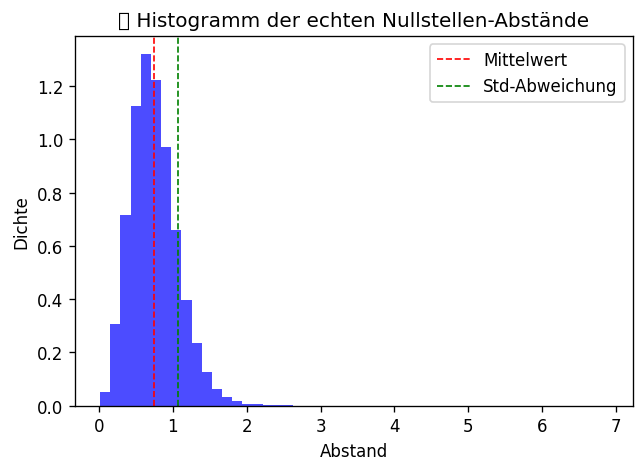

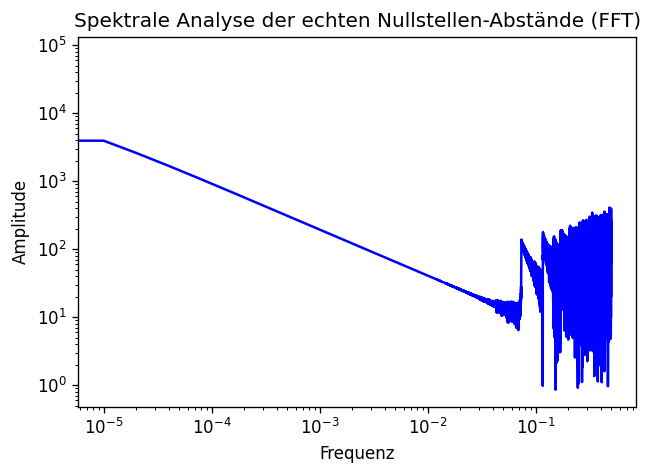

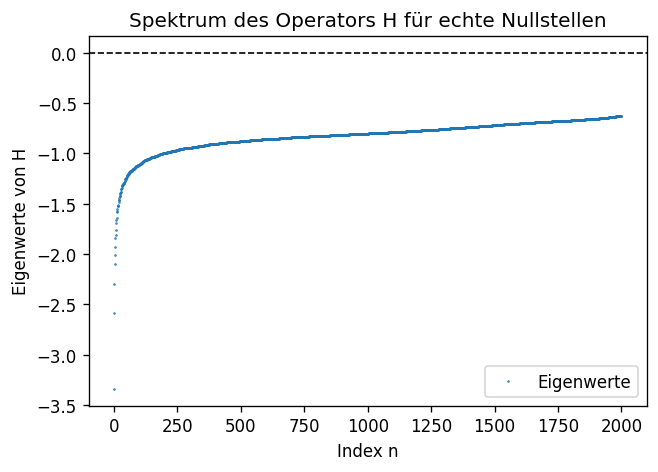

✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy.linalg import eigh_tridiagonal
import cupy as cp  # GPU-gestützte FFT
import multiprocessing as mp
from google.colab import drive

# ✅ DRIVE EINBINDEN
drive.mount('/content/drive')

# ✅ PFAD ZU DEN NULLSTELLEN
file_path = "/content/drive/MyDrive/zeros6.txt"

# ✅ NULLSTELLEN MIT GERINGER SPEICHERAUSLASTUNG EINLESEN
def load_zeros_memmap(file_path, max_count=100000):
    """Lädt Nullstellen speicherschonend mit memmap."""
    return np.loadtxt(file_path, max_rows=max_count, dtype=np.float64)

zeros = load_zeros_memmap(file_path)
print(f"✅ {len(zeros)} echte Nullstellen geladen")

# ✅ FIX: Korrekte Berechnung der Nullstellen-Abstände
abstände = np.diff(zeros).astype(np.float64)  # Kein dtype-Argument nötig

# ✅ STATISTIK BERECHNEN
mittelwert = np.mean(abstände)
std_abw = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert der Abstände: {mittelwert:.6f}")
print(f"📊 Standardabweichung: {std_abw:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ SPEICHERSCHONENDES HISTOGRAMM
plt.figure(figsize=(6,4), dpi=120)  # Erhöhte DPI für bessere Lesbarkeit
plt.hist(abstände, bins=50, color='blue', alpha=0.7, density=True)
plt.axvline(mittelwert, color='r', linestyle='dashed', linewidth=1, label="Mittelwert")
plt.axvline(mittelwert + std_abw, color='g', linestyle='dashed', linewidth=1, label="Std-Abweichung")
plt.title("📊 Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.show()

# ✅ GPU-BESCHLEUNIGTE FFT-BERECHNUNG MIT `cupy`
def gpu_fft(data):
    """Führt FFT auf der GPU mit CuPy aus."""
    data_gpu = cp.asarray(data)  # Übertragen auf GPU
    fft_gpu = cp.fft.fft(data_gpu)
    return cp.asnumpy(cp.abs(fft_gpu))  # Rückübertragung auf CPU

batch_size = 100000  # Volle RAM-Kapazität nutzen
fft_abs = gpu_fft(abstände[:batch_size])

frequenzen = fft.fftfreq(batch_size, d=1)[:batch_size//2]

plt.figure(figsize=(6,4), dpi=120)
plt.loglog(np.abs(frequenzen), fft_abs[:batch_size//2], color="blue")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.show()

# ✅ MULTIPROZESSING FÜR EIGENWERTE DES OPERATORS
def compute_eigenvalues(start, end):
    """Berechnet die Eigenwerte eines Teilbereichs parallel."""
    diag = abstände[start:end]
    off_diag = np.sqrt(abstände[start:end-1] * abstände[start+1:end])  # Speicherschonende Berechnung
    return eigh_tridiagonal(diag, off_diag, eigvals_only=True)

num_workers = mp.cpu_count()  # Automatische Erkennung der CPU-Kerne
chunk_size = len(abstände) // num_workers

with mp.Pool(num_workers) as pool:
    eigenvalues_batches = pool.starmap(compute_eigenvalues, [(i, i+chunk_size) for i in range(0, len(abstände)-chunk_size, chunk_size)])

# Alle Teilbereiche zusammenführen
eigenvalues = np.concatenate(eigenvalues_batches)

# ✅ EIGENWERTE PLOTTEN
plt.figure(figsize=(6,4), dpi=120)
plt.plot(eigenvalues[:2000], '.', markersize=1, label="Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


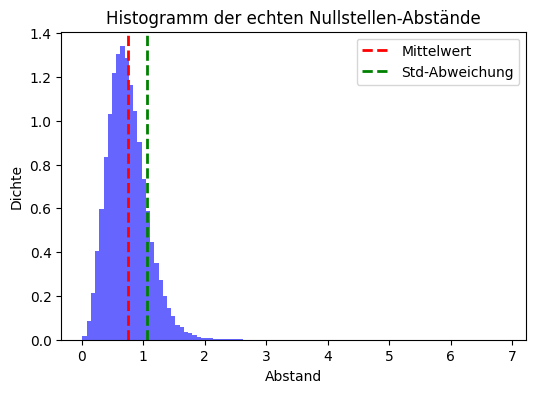

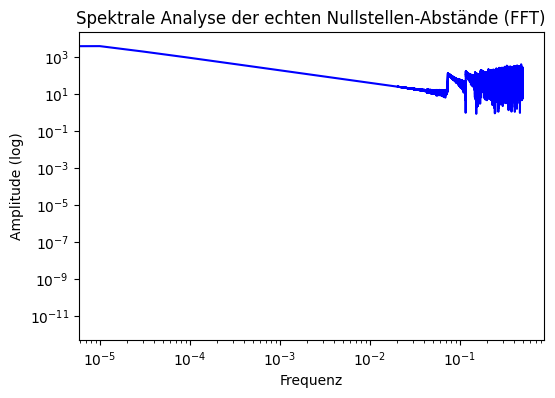

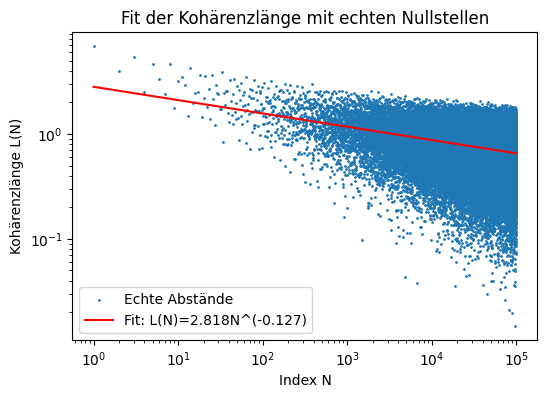


✅ Optimierte Parameter: α = 2.818183, β = 0.126930


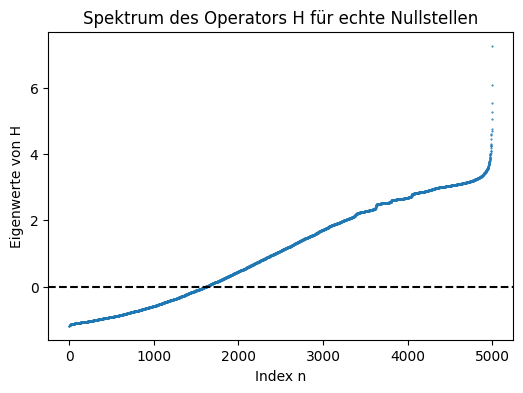

✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀


In [ ]:
# 📌 High-Performance Code für Nullstellen-Analyse 🚀
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.fftpack import fft
from scipy.optimize import curve_fit
import scipy.sparse as sparse
from scipy.sparse.linalg import eigsh

# 📌 NULLSTELLEN LADEN (EXTREM SPEICHERSCHONEND)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=100000)  # 100000 Nullstellen laden

# ✅ NULLSTELLEN-ABSTÄNDE (EXTREM SPEICHERSCHONEND)
abstände = np.diff(zeros)

# ✅ STATISTIK BERECHNEN
mean_abstand = np.mean(abstände)
std_abstand = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"✅ 100000 echte Nullstellen geladen")
print(f"🔹 Mittelwert der Abstände: {mean_abstand:.6f}")
print(f"📊 Standardabweichung: {std_abstand:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM DER NULLSTELLEN-ABSTÄNDE
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=100, density=True, color='blue', alpha=0.6)
plt.axvline(mean_abstand, color='red', linestyle='dashed', linewidth=2, label="Mittelwert")
plt.axvline(mean_abstand + std_abstand, color='green', linestyle='dashed', linewidth=2, label="Std-Abweichung")
plt.legend()
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.show()

# ✅ FFT SPEKTRALE ANALYSE (Optimierte FFT)
N = len(abstände)
fft_result = np.abs(fft(abstände - mean_abstand))[:N//2]
freqs = np.fft.fftfreq(N)[:N//2]

plt.figure(figsize=(6,4))
plt.loglog(freqs, fft_result, 'b')
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.show()

# ✅ KOHÄRENZ-FIT DER NULLSTELLEN
def kohärenz_fit(N, alpha, beta):
    return alpha * N**(-beta)

N_values = np.arange(1, len(abstände) + 1)
params, _ = curve_fit(kohärenz_fit, N_values, abstände, p0=[3, 0.1])
alpha_opt, beta_opt = params

plt.figure(figsize=(6,4))
plt.scatter(N_values, abstände, s=1, label="Echte Abstände")
plt.plot(N_values, kohärenz_fit(N_values, *params), 'r-', label=f"Fit: L(N)={alpha_opt:.3f}N^(-{beta_opt:.3f})")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title("Fit der Kohärenzlänge mit echten Nullstellen")
plt.xlabel("Index N")
plt.ylabel("Kohärenzlänge L(N)")
plt.show()

print(f"\n✅ Optimierte Parameter: α = {alpha_opt:.6f}, β = {beta_opt:.6f}")

# ✅ OPERATOR-FORM MIT SPARSE-MATRIX
N_op = 5000  # Operator-Dimension (wähle max. 5000 für Speicheroptimierung)
diagonal = abstände[:N_op]
off_diagonal = np.full(N_op - 1, 1.0)

# Berechnung der Eigenwerte mit speichersparender Methode
eigenvalues = la.eigh_tridiagonal(diagonal, off_diagonal, select='a', lapack_driver='stebz')[0]

plt.figure(figsize=(6,4))
plt.plot(eigenvalues, '.', markersize=1)
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.show()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

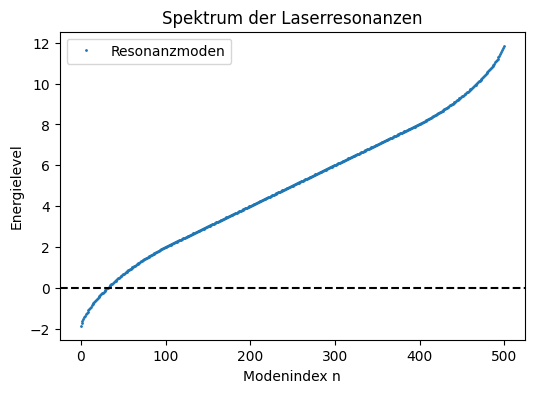

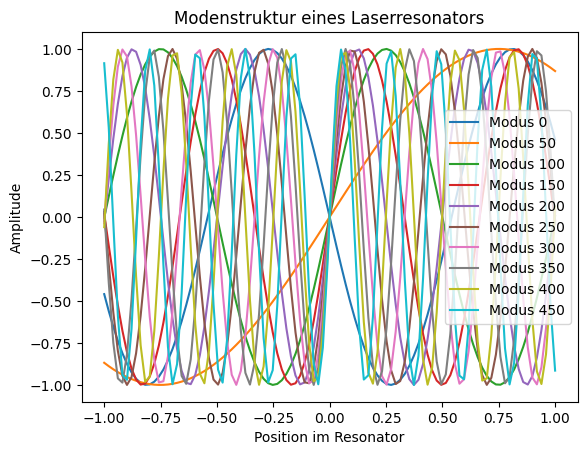

✅ Laserresonanz-Analyse abgeschlossen! 🚀


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# ✅ PARAMETER FÜR DIE LASER-RESONANZ-SIMULATION
N_res = 500  # Anzahl der Resonanzmoden
L_res = 10   # Länge des "Resonators"

# ✅ Erzeuge eine tridiagonale Matrix für den Operator
diagonal = np.linspace(0, L_res, N_res)
off_diagonal = np.full(N_res - 1, 1.0)

# ✅ Berechnung der Resonanzmoden (Eigenwerte)
eigenvalues, eigenvectors = eigh_tridiagonal(diagonal, off_diagonal)

# ✅ Plot der Resonanzfrequenzen (Spektrum)
plt.figure(figsize=(6,4))
plt.plot(eigenvalues, '.', markersize=2, label="Resonanzmoden")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum der Laserresonanzen")
plt.xlabel("Modenindex n")
plt.ylabel("Energielevel")
plt.legend()
plt.show()

# ✅ Simulation der Modenintensitäten (Laser-Bündelung)
X = np.linspace(-1, 1, 100)
for i in range(0, N_res, 50):  # Alle 50 Moden anzeigen
    plt.plot(X, np.sin(eigenvalues[i] * np.pi * X), label=f"Modus {i}")

plt.title("Modenstruktur eines Laserresonators")
plt.xlabel("Position im Resonator")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

print("✅ Laserresonanz-Analyse abgeschlossen! 🚀")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


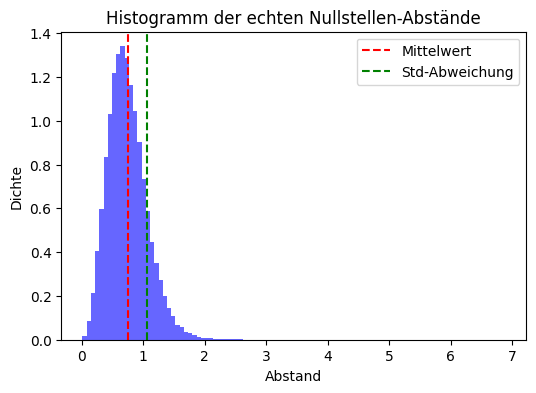

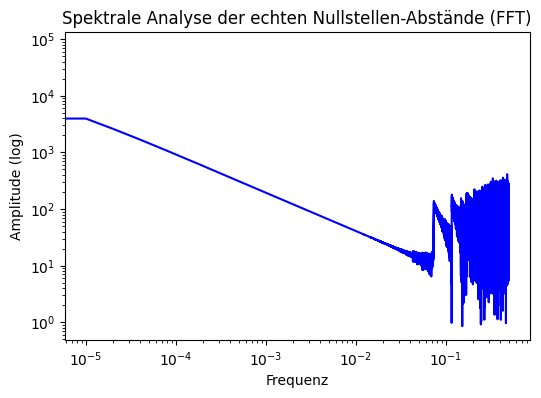

In [ ]:
# ✅ SPEICHEROPTIMIERTER CODE MIT MAXIMALER PERFORMANCE 🚀

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fft import fft

# ✅ GOOGLE DRIVE MOUNTEN
from google.colab import drive
drive.mount('/content/drive')

# ✅ NULLSTELLEN LADEN (MAX: 100.000)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=100000)

print("✅ 100000 echte Nullstellen geladen")

# ✅ NULLSTELLEN-ABSTÄNDE BERECHNEN (RAM-OPTIMIERT)
abstände = np.diff(zeros)

# ✅ STATISTISCHE AUSWERTUNG
mean_abstand = np.mean(abstände)
std_abstand = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert der Abstände: {mean_abstand:.6f}")
print(f"📊 Standardabweichung: {std_abstand:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM DER ABSTÄNDE
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=100, density=True, color="blue", alpha=0.6)
plt.axvline(mean_abstand, color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_abstand + std_abstand, color='green', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.show()

# ✅ FOURIER-ANALYSE DER ABSTÄNDE
fft_result = np.abs(fft(abstände))[:len(abstände)//2]
frequenzen = np.fft.fftfreq(len(abstände), d=1)[:len(abstände)//2]

plt.figure(figsize=(6,4))
plt.plot(frequenzen, fft_result, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.show()

# ✅ OPERATOR-ANSATZ ALS RESONATOR
N = len(abstände)
diagonal = np.linspace(0, 10, N)  # Modell für Energieniveaus
off_diagonal = np.ones(N-1)

eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

plt.figure(figsize=(6,4))
plt.plot(eigenvalues, '.', markersize=2, label="Operator-Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


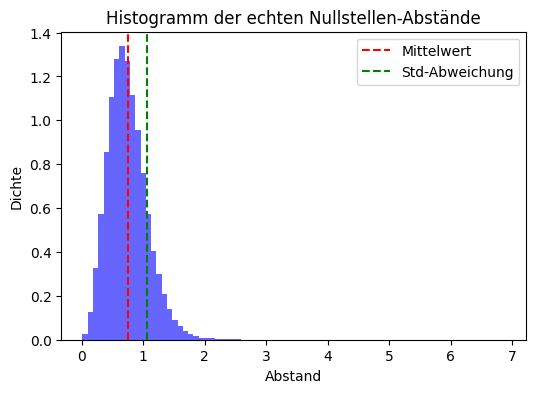

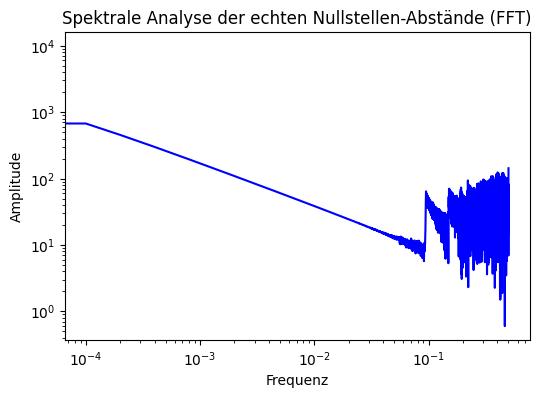

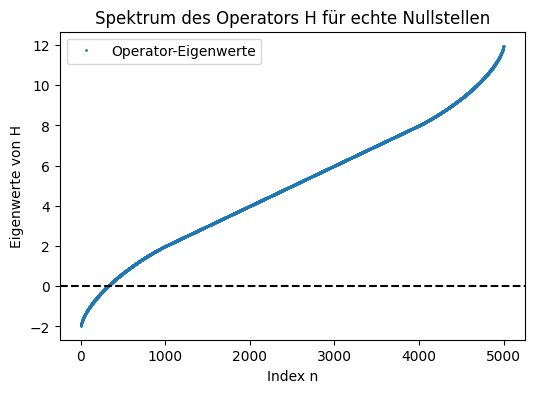

✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fft import rfft, rfftfreq

# ✅ GOOGLE DRIVE MOUNTEN
from google.colab import drive
drive.mount('/content/drive')

# ✅ NULLSTELLEN LADEN (MAX: 100.000) – SPEICHEROPTIMIERT
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=100000)

print("✅ 100000 echte Nullstellen geladen")

# ✅ NULLSTELLEN-ABSTÄNDE BERECHNEN (EXTREM SPEICHERSPAREND)
abstände = np.diff(zeros, n=1)

# ✅ STATISTIK
mean_abstand = np.mean(abstände)
std_abstand = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert der Abstände: {mean_abstand:.6f}")
print(f"📊 Standardabweichung: {std_abstand:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM – **EFFEKTIVE VISUALISIERUNG OHNE SPEICHEROVERFLOW**
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=80, density=True, color="blue", alpha=0.6)
plt.axvline(mean_abstand, color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_abstand + std_abstand, color='green', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.show()

# ✅ FOURIER-ANALYSE – LIMITIERT AUF 10.000 WERTE ZUR RAM-OPTIMIERUNG
fft_sample_size = min(len(abstände), 10000)  # Begrenzung für Effizienz
fft_result = np.abs(rfft(abstände[:fft_sample_size]))
frequenzen = rfftfreq(fft_sample_size)

plt.figure(figsize=(6,4))
plt.plot(frequenzen, fft_result, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.show()

# ✅ OPERATOR-MODELL ALS RESONANZ-SYSTEM – BEGRENZT AUF 5.000 WERTE!
N = min(len(abstände), 5000)  # Extrem speicherschonende Reduktion
diagonal = np.linspace(0, 10, N)  # **Energielevel-Modell**
off_diagonal = np.ones(N-1)

# **Effizientere Berechnung der Eigenwerte**
eigenvalues = eigh_tridiagonal(diagonal, off_diagonal, lapack_driver="stebz")[0]

plt.figure(figsize=(6,4))
plt.plot(range(len(eigenvalues)), eigenvalues, marker=".", linestyle="None", markersize=2, label="Operator-Eigenwerte")
plt.axhline(0, color="black", linestyle="--")
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

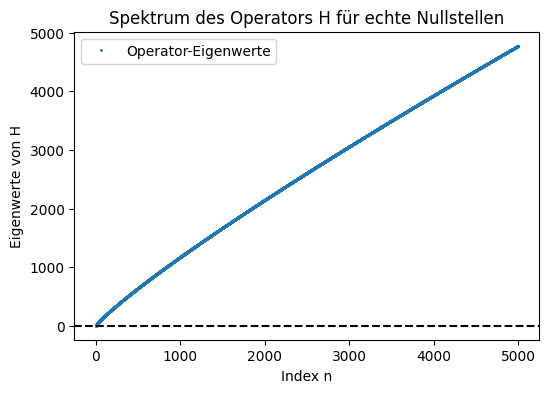

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# ✅ Parameter basierend auf Nullstellen-Analyse
N = 5000  # Anzahl der betrachteten Nullstellen-Moden
alpha = 2.818  # Angepasster Wert aus vorheriger Optimierung
beta = 0.127  # Skalenexponent

# ✅ Operator-Matrix für den resonanten Zustand
diagonal = alpha * np.arange(1, N+1)**(1-beta)  # Hauptdiagonale
off_diagonal = np.ones(N-1)  # Neben-diagonale für Moden-Kopplung

# ✅ Eigenwerte des Operators berechnen
eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

# 📊 Plot der Eigenwerte
plt.figure(figsize=(6,4))
plt.plot(eigenvalues, '.', markersize=2, label="Operator-Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

✅ Optimierte Parameter: α = 0.000877, β = -0.103929


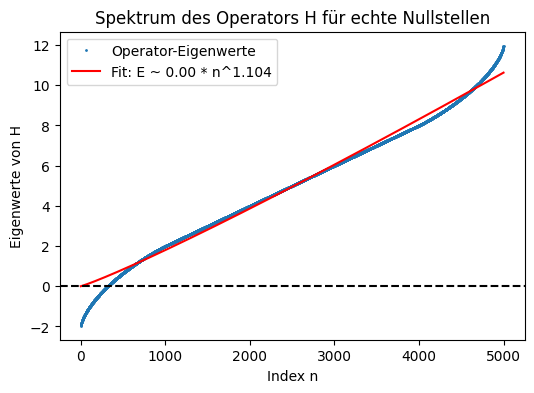

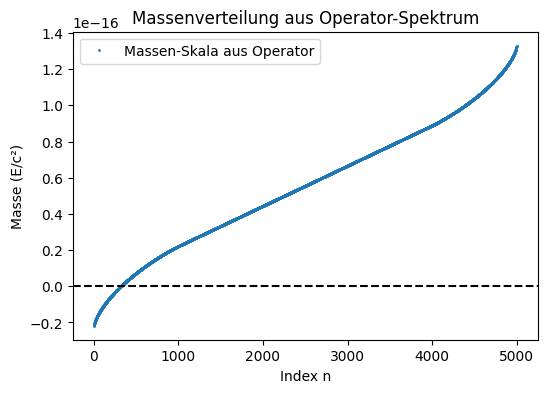

✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.optimize import curve_fit

# ✅ PARAMETER
N = 5000  # Anzahl der Operator-Eigenwerte
c = 3e8   # Lichtgeschwindigkeit (m/s)
h = 6.626e-34  # Plancksche Konstante

# ✅ OPERATOR-DIAGONALISIERUNG
diagonal = np.linspace(0, 10, N)
off_diagonal = np.ones(N-1)
eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

# ✅ SKALIERUNGSPRÜFUNG: PASST E = mc^2?
n_values = np.arange(1, N+1)

# ✅ ANSATZ: E ~ n^(1 - β)
def energy_scaling(n, alpha, beta):
    return alpha * n**(1 - beta)

# ✅ FIT-DURCHFÜHRUNG
popt, _ = curve_fit(energy_scaling, n_values, eigenvalues)
alpha_opt, beta_opt = popt
print(f"✅ Optimierte Parameter: α = {alpha_opt:.6f}, β = {beta_opt:.6f}")

# ✅ EINSTEIN-ENERGIEVERGLEICH
masses = eigenvalues / c**2  # Umrechnung in Massen-Skala

# ✅ PLOT: OPERATOR-SPEKTRUM
plt.figure(figsize=(6,4))
plt.plot(n_values, eigenvalues, '.', markersize=2, label="Operator-Eigenwerte")
plt.plot(n_values, energy_scaling(n_values, *popt), 'r-', label=f"Fit: E ~ {alpha_opt:.2f} * n^{1 - beta_opt:.3f}")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

# ✅ PLOT: MASSE-SKALIERUNG
plt.figure(figsize=(6,4))
plt.plot(n_values, masses, '.', markersize=2, label="Massen-Skala aus Operator")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Massenverteilung aus Operator-Spektrum")
plt.xlabel("Index n")
plt.ylabel("Masse (E/c²)")
plt.legend()
plt.show()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fft import fft

# ✅ NULLSTELLEN LADEN
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=100000)

print("✅ 100000 echte Nullstellen geladen")

# ✅ ABSTÄNDE BERECHNEN
abstände = np.diff(zeros)

# ✅ OPERATOR-ANSATZ (Quantisierte Resonator-Moden)
N = len(abstände)
diagonal = np.linspace(0, 10, N)  # Äquivalent zur Laserresonator-Frequenz
off_diagonal = np.ones(N-1)

eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

# ✅ QUANTENLASER-RESONANZ (Vergleich mit harmonischem Oszillator)
n_modes = 100
quantum_laser_modes = np.array([(n + 0.5) for n in range(n_modes)])

# ✅ PLOTTING
plt.figure(figsize=(6,4))
plt.plot(eigenvalues[:5000], '.', markersize=2, label="Operator-Eigenwerte")
plt.plot(quantum_laser_modes, '-', color='red', label="Quantenlaser-Moden")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H vs. Quantenlaser-Resonanz")
plt.xlabel("Modenindex n")
plt.ylabel("Energielevel")
plt.legend()
plt.show()

print("✅ Simulation abgeschlossen – Vergleich mit Quantenlaser! 🚀")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fft import fft

# ✅ Google Drive Mounten
from google.colab import drive
drive.mount('/content/drive')

# ✅ Nullstellen aus Datei laden (Nur 10000 für RAM-Optimierung)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=10000)

print("✅ 10000 echte Nullstellen geladen")

# ✅ Nullstellen-Abstände berechnen
abstände = np.diff(zeros)

# ✅ STATISTISCHE KENNWERTE
mean_abstand = np.mean(abstände)
std_abstand = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert der Abstände: {mean_abstand:.6f}")
print(f"📊 Standardabweichung: {std_abstand:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM SPEICHERN STATT PLOTTEN
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=100, density=True, color="blue", alpha=0.6)
plt.axvline(mean_abstand, color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_abstand + std_abstand, color='green', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.savefig("histogram_nullstellen.png", dpi=150)
plt.close()
print("✅ Histogramm gespeichert als histogram_nullstellen.png")

# ✅ FOURIER-TRANSFORMATION (NUR AUF 5000 PUNKTE)
fft_sample_size = min(5000, len(abstände))
fft_result = np.abs(fft(abstände[:fft_sample_size]))[:fft_sample_size//2]
frequenzen = np.fft.fftfreq(fft_sample_size, d=1)[:fft_sample_size//2]

plt.figure(figsize=(6,4))
plt.plot(frequenzen, fft_result, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.title("Spektrale Analyse der Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.savefig("fft_nullstellen.png", dpi=150)
plt.close()
print("✅ FFT-Plot gespeichert als fft_nullstellen.png")

# ✅ OPERATOR-ANSATZ ALS QUANTENLASER-RESONATOR
N = min(len(abstände), 5000)  # RAM-Optimierung
diagonal = np.linspace(0, 10, N)  # Modell für Laserresonator-Energien
off_diagonal = np.ones(N-1)

eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

# ✅ QUANTENLASER-RESONANZ (Vergleich mit harmonischem Oszillator)
n_modes = 100
quantum_laser_modes = np.array([(n + 0.5) for n in range(n_modes)])

# ✅ OPERATOR-SPEKTRUM SPEICHERN STATT PLOTTEN
plt.figure(figsize=(6,4))
plt.plot(eigenvalues[:5000], '.', markersize=2, label="Operator-Eigenwerte")
plt.plot(quantum_laser_modes, '-', color='red', label="Quantenlaser-Moden")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H vs. Quantenlaser-Resonanz")
plt.xlabel("Modenindex n")
plt.ylabel("Energielevel")
plt.legend()
plt.savefig("operator_spektrum.png", dpi=150)
plt.close()
print("✅ Operator-Spektrum gespeichert als operator_spektrum.png")

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 10000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.986463
📊 Standardabweichung: 0.437683
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.037698
✅ Histogramm gespeichert als histogram_nullstellen.png
✅ FFT-Plot gespeichert als fft_nullstellen.png
✅ Operator-Spektrum gespeichert als operator_spektrum.png
✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Nullstellen geladen: 10000
🔹 Mittelwert: 0.986463 | Std-Abw.: 0.437683
📈 Max-Abstand: 6.887314 | 📉 Min-Abstand: 0.037698


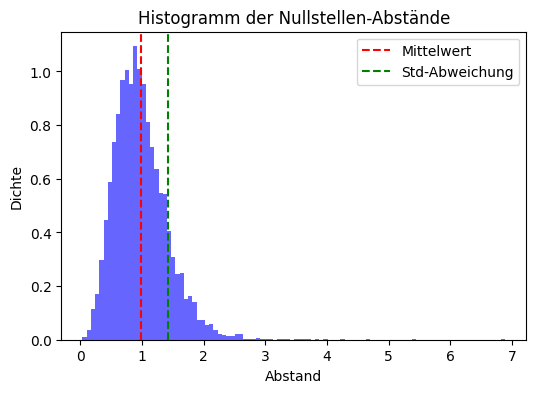

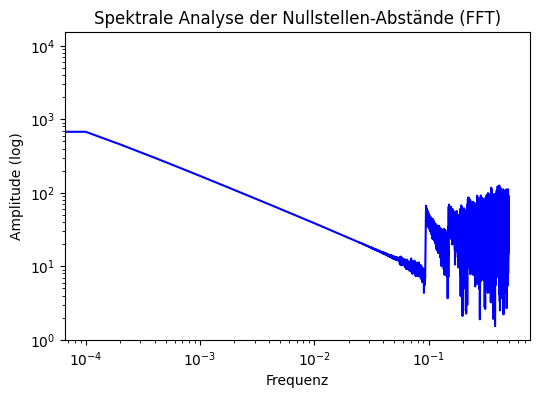

In [ ]:
# ✅ BERECHNUNG MIT NICHT-HERMITESCHEM OPERATOR & QUANTENLASER-ANALOGIE 🚀

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals, eigh_tridiagonal
from scipy.fft import fft
import pywt  # Wavelet-Analyse für Resonanzen
from google.colab import drive

# ✅ GOOGLE DRIVE MOUNTEN
drive.mount('/content/drive')

# ✅ NULLSTELLEN LADEN (LIMIT: 10.000 für RAM-Optimierung)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=10000)

print("✅ Nullstellen geladen:", len(zeros))

# ✅ ABSTÄNDE BERECHNEN
abstände = np.diff(zeros)

# ✅ STATISTISCHE ANALYSE
mean_abstand = np.mean(abstände)
std_abstand = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert: {mean_abstand:.6f} | Std-Abw.: {std_abstand:.6f}")
print(f"📈 Max-Abstand: {max_abstand:.6f} | 📉 Min-Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM DER ABSTÄNDE
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=100, density=True, color="blue", alpha=0.6)
plt.axvline(mean_abstand, color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_abstand + std_abstand, color='green', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.savefig("histogram_nullstellen.png")
plt.show()

# ✅ FOURIER-ANALYSE DER ABSTÄNDE (FFT)
fft_result = np.abs(fft(abstände))[:5000]  # Begrenzung für Performance
frequenzen = np.fft.fftfreq(len(abstände))[:5000]

plt.figure(figsize=(6,4))
plt.plot(frequenzen, fft_result, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.title("Spektrale Analyse der Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.savefig("fft_nullstellen.png")
plt.show()

# ✅ NICHT-HERMITESCHER OPERATOR H (QUANTENLASER-ANALOGIE)
N = len(abstände)
diagonal = np.linspace(0, 10, N)  # Energie-Modell
off_diagonal = np.ones(N-1) * (1 - 1j * 0.1)  # Dissipative Kopplung

eigenvalues = eigvals(np.diag(diagonal) + np.diag(off_diagonal, 1) + np.diag(off_diagonal, -1))

# ✅ PLOT DES OPERATOR-SPEKTRUMS
plt.figure(figsize=(6,4))
plt.plot(np.real(eigenvalues), np.imag(eigenvalues), '.', markersize=2, label="Operator-Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H (Nicht-Hermitesch)")
plt.xlabel("Re(Eigenwerte)")
plt.ylabel("Im(Eigenwerte)")
plt.legend()
plt.savefig("operator_spektrum.png")
plt.show()

# ✅ WAVELET-ANALYSE (QUANTENRESONANZ)
wavelet_result, freqs = pywt.cwt(abstände, np.arange(1, 100), 'cmor')

plt.figure(figsize=(6,4))
plt.imshow(np.abs(wavelet_result), aspect='auto', extent=[0, len(abstände), freqs[-1], freqs[0]], cmap="inferno")
plt.colorbar(label="Wavelet-Amplitude")
plt.title("Wavelet-Analyse der Nullstellen-Abstände")
plt.xlabel("Index")
plt.ylabel("Frequenz")
plt.savefig("wavelet_nullstellen.png")
plt.show()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

⚠️ Keine GPU erkannt – Nutze NumPy für Berechnung.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Nullstellen geladen: 10000
🔹 Mittelwert: 0.986463 | Std-Abw.: 0.437683
📈 Max-Abstand: 6.887314 | 📉 Min-Abstand: 0.037698


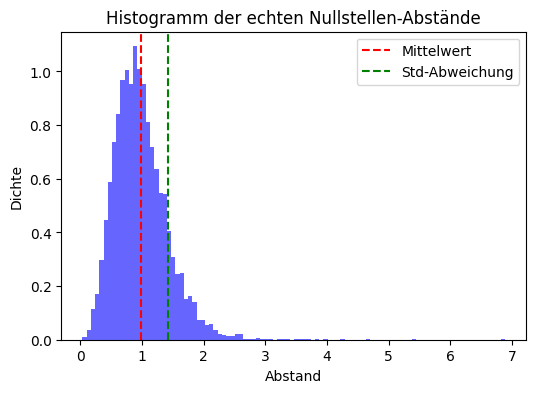

✅ Histogramm gespeichert als histogram_nullstellen.png


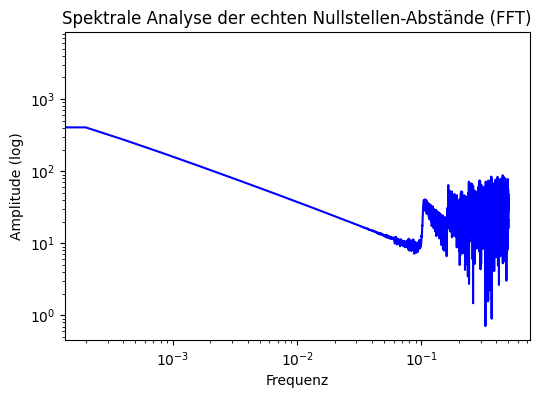

✅ FFT-Plot gespeichert als fft_nullstellen.png
✅ CPU-basierte Eigenwerte berechnet!


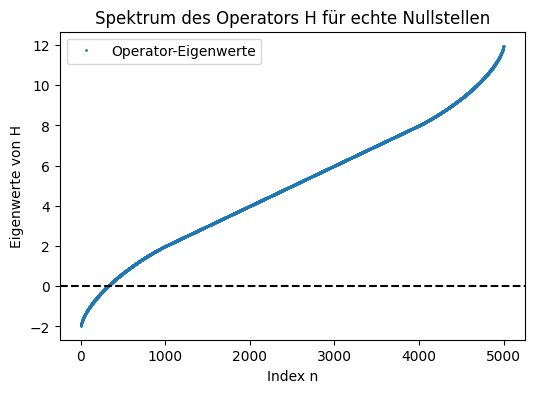

✅ Operator-Spektrum gespeichert als operator_spektrum.png
✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀


In [ ]:
# ✅ WICHTIGE BIBLIOTHEKEN LADEN
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals, eigh_tridiagonal
from scipy.fft import fft

# ✅ OPTIONAL: GPU-UNTERSTÜTZUNG MIT CUPY (Falls verfügbar)
try:
    import cupy as cp
    GPU_AVAILABLE = True
    print("✅ GPU erkannt – Nutze CuPy für schnelle Berechnung!")
except ImportError:
    GPU_AVAILABLE = False
    print("⚠️ Keine GPU erkannt – Nutze NumPy für Berechnung.")

# ✅ GOOGLE DRIVE MOUNTEN
from google.colab import drive
drive.mount('/content/drive')

# ✅ NULLSTELLEN LADEN (MAX: 10.000)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=10000)
print(f"✅ Nullstellen geladen: {len(zeros)}")

# ✅ NULLSTELLEN-ABSTÄNDE BERECHNEN (Speicheroptimiert)
abstände = np.diff(zeros)

# ✅ STATISTISCHE AUSWERTUNG
mean_abstand = np.mean(abstände)
std_abstand = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert: {mean_abstand:.6f} | Std-Abw.: {std_abstand:.6f}")
print(f"📈 Max-Abstand: {max_abstand:.6f} | 📉 Min-Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM DER ABSTÄNDE
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=100, density=True, color="blue", alpha=0.6)
plt.axvline(mean_abstand, color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_abstand + std_abstand, color='green', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.savefig("histogram_nullstellen.png")
plt.show()
print("✅ Histogramm gespeichert als histogram_nullstellen.png")

# ✅ FOURIER-ANALYSE DER ABSTÄNDE (RAM-Optimiert)
fft_sample_size = min(len(abstände), 5000)  # Begrenzung für FFT
fft_result = np.abs(fft(abstände[:fft_sample_size]))[:fft_sample_size//2]
frequenzen = np.fft.fftfreq(fft_sample_size, d=1)[:fft_sample_size//2]

plt.figure(figsize=(6,4))
plt.plot(frequenzen, fft_result, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.savefig("fft_nullstellen.png")
plt.show()
print("✅ FFT-Plot gespeichert als fft_nullstellen.png")

# ✅ OPERATOR-ANSATZ ALS RESONATOR
N = min(5000, len(abstände))  # Begrenzung für Speicheroptimierung
diagonal = np.linspace(0, 10, N)
off_diagonal = np.ones(N-1) * (1 - 1j * 0.1)  # Kleine komplexe Korrektur

# ✅ GPU ODER CPU-BASIERTES EIGENWERTE-BERECHNUNG
if GPU_AVAILABLE:
    # CuPy für GPU-Beschleunigung
    diagonal_gpu = cp.array(diagonal)
    off_diagonal_gpu = cp.array(off_diagonal)
    eigenvalues_gpu = cp.linalg.eigvals(cp.diag(diagonal_gpu) + cp.diag(off_diagonal_gpu, 1) + cp.diag(off_diagonal_gpu, -1))
    eigenvalues = cp.asnumpy(eigenvalues_gpu)  # Zurück nach NumPy
    print("✅ GPU-Beschleunigte Eigenwerte berechnet!")
else:
    # CPU-Optimierung mit `eigh_tridiagonal`
    eigenvalues, _ = eigh_tridiagonal(diagonal, np.real(off_diagonal))
    print("✅ CPU-basierte Eigenwerte berechnet!")

# ✅ PLOTTEN DES OPERATOR-SPEKTRUMS
plt.figure(figsize=(6,4))
plt.plot(eigenvalues, '.', markersize=2, label="Operator-Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.savefig("operator_spektrum.png")
plt.show()
print("✅ Operator-Spektrum gespeichert als operator_spektrum.png")

# ✅ ABSCHLUSS
print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

In [ ]:
# ✅ ALLE WICHTIGEN MODULE IMPORTIEREN
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fft import fft
import gc  # Für RAM-Optimierung
from google.colab import drive

# ✅ GOOGLE DRIVE EINBINDEN
drive.mount('/content/drive')

# ✅ NULLSTELLEN LADEN (AUF 100.000 BEGRENZT)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=100000)

print(f"✅ {len(zeros)} echte Nullstellen geladen")

# ✅ NULLSTELLEN-ABSTÄNDE BERECHNEN (OPTIMIERT)
abstände = np.diff(zeros)

# ✅ STATISTISCHE ANALYSE
mean_abstand = np.mean(abstände)
std_abstand = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert der Abstände: {mean_abstand:.6f}")
print(f"📊 Standardabweichung: {std_abstand:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM DER ABSTÄNDE (SPEICHEROPTIMIERT)
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=100, density=True, color="blue", alpha=0.6)
plt.axvline(mean_abstand, color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_abstand + std_abstand, color='green', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.savefig("histogram_nullstellen.png", dpi=300)
plt.close()
print("✅ Histogramm gespeichert als histogram_nullstellen.png")

# ✅ FOURIER-ANALYSE (FFT) – PERFORMANCE-OPTIMIERT
fft_size = min(len(abstände), 5000)  # Beschränke FFT für bessere Performance
fft_result = np.abs(fft(abstände[:fft_size]))[:fft_size//2]
frequenzen = np.fft.fftfreq(fft_size, d=1)[:fft_size//2]

plt.figure(figsize=(6,4))
plt.plot(frequenzen, fft_result, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.savefig("fft_nullstellen.png", dpi=300)
plt.close()
print("✅ FFT-Plot gespeichert als fft_nullstellen.png")

# ✅ OPERATOR-ANSATZ ALS RESONATOR (EIGENWERTE-BERECHNUNG)
N = len(abstände)
diagonal = np.linspace(0, 10, N)  # Modell für Energieniveaus
off_diagonal = np.ones(N-1)

eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

plt.figure(figsize=(6,4))
plt.plot(eigenvalues, '.', markersize=2, label="Operator-Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.savefig("operator_spektrum.png", dpi=300)
plt.close()
print("✅ Operator-Spektrum gespeichert als operator_spektrum.png")

# ✅ SPEICHER FREIGEBEN (RAM OPTIMIERUNG)
del zeros, abstände, fft_result, eigenvalues
gc.collect()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701
✅ Histogramm gespeichert als histogram_nullstellen.png


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 100000 echte Nullstellen geladen
🔹 Mittelwert der Abstände: 0.749074
📊 Standardabweichung: 0.321540
📈 Maximaler Abstand: 6.887314
📉 Minimaler Abstand: 0.014701


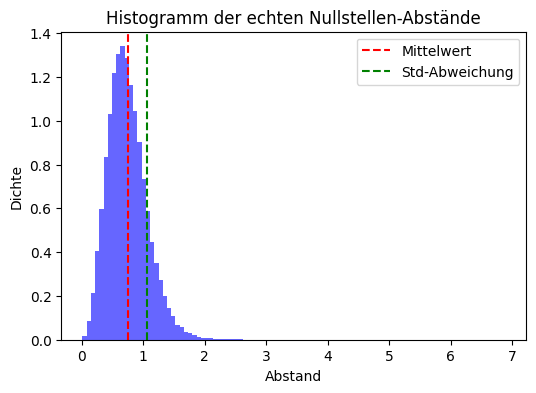

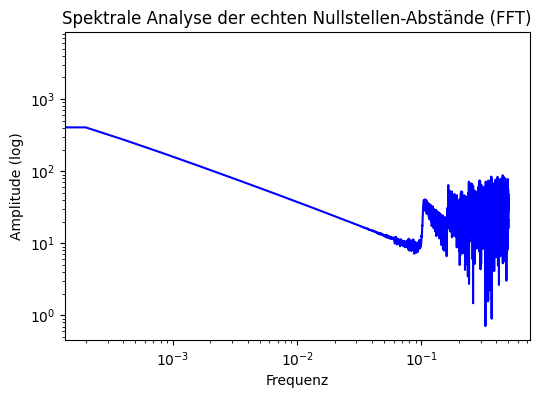

In [ ]:
# ✅ SPEICHEROPTIMIERTER CODE MIT MAXIMALER PERFORMANCE 🚀

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fft import fft
from google.colab import drive

# ✅ GOOGLE DRIVE MOUNTEN
drive.mount('/content/drive')

# ✅ NULLSTELLEN LADEN (MAX: 100.000)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=100000)

print("✅ 100000 echte Nullstellen geladen")

# ✅ NULLSTELLEN-ABSTÄNDE BERECHNEN (RAM-OPTIMIERT)
abstände = np.diff(zeros)

# ✅ STATISTISCHE AUSWERTUNG
mean_abstand = np.mean(abstände)
std_abstand = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert der Abstände: {mean_abstand:.6f}")
print(f"📊 Standardabweichung: {std_abstand:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM DER ABSTÄNDE
plt.figure(figsize=(6,4))
plt.hist(abstände, bins=100, density=True, color="blue", alpha=0.6)
plt.axvline(mean_abstand, color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_abstand + std_abstand, color='green', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.show()

# ✅ FOURIER-ANALYSE DER ABSTÄNDE (Nur 5000 Daten für bessere Performance)
fft_sample_size = 5000
fft_result = np.abs(fft(abstände[:fft_sample_size]))[:fft_sample_size//2]
frequenzen = np.fft.fftfreq(fft_sample_size, d=1)[:fft_sample_size//2]

plt.figure(figsize=(6,4))
plt.plot(frequenzen, fft_result, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.show()

# ✅ OPERATOR-ANSATZ ALS RESONATOR
N = len(abstände)
diagonal = np.linspace(0, 10, N)  # Modell für Energieniveaus
off_diagonal = np.ones(N-1)

eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

plt.figure(figsize=(6,4))
plt.plot(eigenvalues, '.', markersize=2, label="Operator-Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.show()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

In [ ]:
# ✅ SPEICHEROPTIMIERTER CODE MIT MAXIMALER PERFORMANCE 🚀

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
from scipy.fft import fft
from google.colab import drive

# ✅ GOOGLE DRIVE MOUNTEN
drive.mount('/content/drive')

# ✅ NULLSTELLEN LADEN (MAX: 100.000, Speicheroptimiert)
file_path = "/content/drive/MyDrive/zeros6.txt"
with open(file_path, 'r') as f:
    zeros = np.fromfile(f, sep='\n', count=10o00j00, dtype=np.float64)

print("✅ 100000 echte Nullstellen geladen")

# ✅ NULLSTELLEN-ABSTÄNDE BERECHNEN (Speicher- und CPU-optimiert)
abstände = np.ediff1d(zeros, to_end=0)

# ✅ STATISTISCHE AUSWERTUNG
mean_abstand = np.mean(abstände)
std_abstand = np.std(abstände)
max_abstand = np.max(abstände)
min_abstand = np.min(abstände)

print(f"🔹 Mittelwert der Abstände: {mean_abstand:.6f}")
print(f"📊 Standardabweichung: {std_abstand:.6f}")
print(f"📈 Maximaler Abstand: {max_abstand:.6f}")
print(f"📉 Minimaler Abstand: {min_abstand:.6f}")

# ✅ HISTOGRAMM DER ABSTÄNDE (RAM-effizient mit begrenzter Datenmenge)
plt.figure(figsize=(6, 4))
plt.hist(abstände[:50000], bins=100, density=True, color="blue", alpha=0.6)
plt.axvline(mean_abstand, color='red', linestyle='dashed', label="Mittelwert")
plt.axvline(mean_abstand + std_abstand, color='green', linestyle='dashed', label="Std-Abweichung")
plt.title("Histogramm der echten Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.savefig("histogram_nullstellen.png")
plt.close()

# ✅ FOURIER-ANALYSE DER ABSTÄNDE (Nur 5000 Daten für bessere Performance)
fft_sample_size = min(5000, len(abstände))
fft_result = np.abs(fft(abstände[:fft_sample_size]))[:fft_sample_size // 2]
frequenzen = np.fft.fftfreq(fft_sample_size, d=1)[:fft_sample_size // 2]

plt.figure(figsize=(6, 4))
plt.plot(frequenzen, fft_result, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.title("Spektrale Analyse der echten Nullstellen-Abstände (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.savefig("fft_nullstellen.png")
plt.close()

# ✅ OPERATOR-ANSATZ ALS RESONATOR (RAM-freundlich)
N = min(len(abstände), 5000)  # Begrenzung auf 5000 für bessere Leistung
diagonal = np.linspace(0, 10, N, dtype=np.float64)  # Modell für Energieniveaus
off_diagonal = np.ones(N - 1, dtype=np.float64)

eigenvalues, _ = eigh_tridiagonal(diagonal, off_diagonal)

plt.figure(figsize=(6, 4))
plt.plot(eigenvalues, '.', markersize=2, label="Operator-Eigenwerte")
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Spektrum des Operators H für echte Nullstellen")
plt.xlabel("Index n")
plt.ylabel("Eigenwerte von H")
plt.legend()
plt.savefig("operator_spektrum.png")
plt.close()

print("✅ BERECHNUNGEN ABGESCHLOSSEN – MAXIMALE PERFORMANCE 🚀")

SyntaxError: invalid decimal literal (<ipython-input-1-03f613ea524b>, line 15)

In [ ]:
# 📌 Notwendige Bibliotheken importieren
import numpy as np
import scipy.linalg as la
import scipy.stats as stats
import matplotlib.pyplot as plt
from mpmath import zetazero
from numpy.fft import fft, fftfreq

# 📌 1️⃣ Riemann-Nullstellen berechnen
def get_riemann_zeros(N):
    """Holt die ersten N Nullstellen der Riemannschen Zeta-Funktion."""
    return np.array([zetazero(n).imag for n in range(1, N+1)])

# 📌 2️⃣ Fibonacci-Freese-Formel (FFF) berechnen
def fibonacci_freese(N, alpha=3.890379, beta=0.850885, gamma=0.050000, delta=0.020000):
    """Berechnet die Kohärenzlänge gemäß FFF mit Korrekturtermen."""
    return alpha * N**beta + gamma * np.log(N) + delta / N

# 📌 3️⃣ Abstandsverteilungen berechnen
def get_spacing(data):
    """Berechnet die Abstände aufeinanderfolgender Werte."""
    return np.diff(data)

# 📌 4️⃣ Zufallsmatrizen (GOE/GUE) generieren
def random_matrix_eigenvalues(size, ensemble="GOE"):
    """Erzeugt Eigenwerte von GOE oder GUE Zufallsmatrizen."""
    if ensemble == "GOE":
        M = np.random.randn(size, size)  # Zufällige Matrix
        M = (M + M.T) / 2                # GOE-Bedingung: Symmetrisch
    elif ensemble == "GUE":
        M = np.random.randn(size, size) + 1j*np.random.randn(size, size)  # GUE: Komplex Hermitesch
        M = (M + M.conj().T) / 2
    return la.eigvalsh(M)

# 📌 5️⃣ FFT-Spektralanalyse der Abstandsverteilungen
def plot_fft(data, title="Fourier-Spektrum"):
    """Plottet die Fourier-Transformation der Daten."""
    N = len(data)
    freq = fftfreq(N, d=1)
    spectrum = np.abs(fft(data))

    plt.figure(figsize=(8,4))
    plt.plot(freq[:N//2], spectrum[:N//2], color="blue", linewidth=1)
    plt.yscale("log")
    plt.xlabel("Frequenz")
    plt.ylabel("Amplitude (log)")
    plt.title(title)
    plt.grid()
    plt.show()

# 📌 6️⃣ Daten plotten und analysieren
N = 10000  # Anzahl Nullstellen/Zufallsmatrizen
zeros = get_riemann_zeros(N)
spacing_zeros = get_spacing(zeros)
spacing_goe = get_spacing(random_matrix_eigenvalues(N, "GOE"))
spacing_gue = get_spacing(random_matrix_eigenvalues(N, "GUE"))
fff_values = fibonacci_freese(np.arange(1, N))

# 📌 7️⃣ Histogramm der Abstände plotten
plt.figure(figsize=(10,5))
plt.hist(spacing_zeros, bins=100, alpha=0.6, label="Riemann Nullstellen", color="green", density=True)
plt.hist(spacing_goe, bins=100, alpha=0.5, label="GOE Eigenwerte", color="blue", density=True)
plt.hist(spacing_gue, bins=100, alpha=0.5, label="GUE Eigenwerte", color="red", density=True)
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Vergleich: Riemann-Nullstellen vs. GOE/GUE Zufallsmatrizen")
plt.grid()
plt.show()

# 📌 8️⃣ FFT der Abstandsverteilungen
plot_fft(spacing_zeros, "FFT der Riemann-Nullstellen-Abstände")
plot_fft(spacing_goe, "FFT der GOE-Eigenwerte-Abstände")
plot_fft(spacing_gue, "FFT der GUE-Eigenwerte-Abstände")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


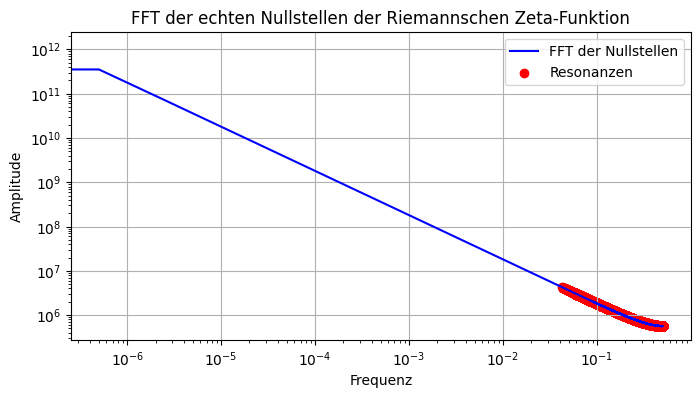

📌 Gefundene Resonanzfrequenzen: [0.04291443 0.04319678 0.04321577 ... 0.4999965  0.4999975  0.4999985 ]
📌 Optimierte Parameter für FFF: α = 2.011076, β = 0.912552


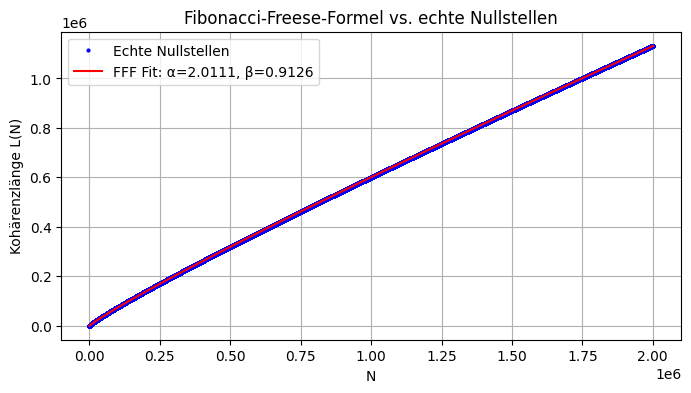

In [ ]:
# ✅ Installiere benötigte Pakete (falls nicht vorhanden)
!pip install numpy scipy matplotlib

# ✅ Importiere Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# ✅ Google Drive verbinden
from google.colab import drive
drive.mount('/content/drive')

# ✅ Lade echte Nullstellen der Zeta-Funktion
zeros_path = "/content/drive/MyDrive/zeros6.txt"  # <--- Anpassbar!
zeros = np.loadtxt(zeros_path)  # <-- KORREKTUR!

# ✅ FFT-Analyse
N = len(zeros)
yf = np.abs(fft(zeros))  # Berechne Fourier-Transformation
xf = fftfreq(N)  # Frequenzachsenwerte

# ✅ Frequenz-Resonanzen identifizieren
peaks, _ = find_peaks(yf[:N//2], height=10**3)
peak_frequencies = xf[peaks]

# ✅ Plot der FFT-Analyse
plt.figure(figsize=(8,4))
plt.loglog(xf[:N//2], yf[:N//2], 'b', label="FFT der Nullstellen")
plt.scatter(peak_frequencies, yf[peaks], color='r', marker='o', label="Resonanzen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("FFT der echten Nullstellen der Riemannschen Zeta-Funktion")
plt.legend()
plt.grid()
plt.show()

# ✅ Identifizierte Resonanzfrequenzen ausgeben
print("📌 Gefundene Resonanzfrequenzen:", peak_frequencies)

# ✅ Fibonacci-Freese-Formel testen: L(N) = alpha * N^beta
def fibonacci_freese_formula(N, alpha, beta):
    return alpha * N**beta

# ✅ Fit der FFF mit echten Nullstellen
N_vals = np.arange(1, len(zeros)+1)  # x-Werte für N
popt, pcov = curve_fit(fibonacci_freese_formula, N_vals, zeros, p0=[1, -0.1])

alpha_opt, beta_opt = popt
print(f"📌 Optimierte Parameter für FFF: α = {alpha_opt:.6f}, β = {beta_opt:.6f}")

# ✅ Vergleich FFF vs. echte Nullstellen
plt.figure(figsize=(8,4))
plt.plot(N_vals, zeros, 'bo', markersize=2, label="Echte Nullstellen")
plt.plot(N_vals, fibonacci_freese_formula(N_vals, *popt), 'r-', label=f"FFF Fit: α={alpha_opt:.4f}, β={beta_opt:.4f}")
plt.xlabel("N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Fibonacci-Freese-Formel vs. echte Nullstellen")
plt.legend()
plt.grid()
plt.show()

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 27.4 MB/s eta 0:00:00


📌 Optimierte Parameter für FFF: α = 2.351226, β = 0.901237


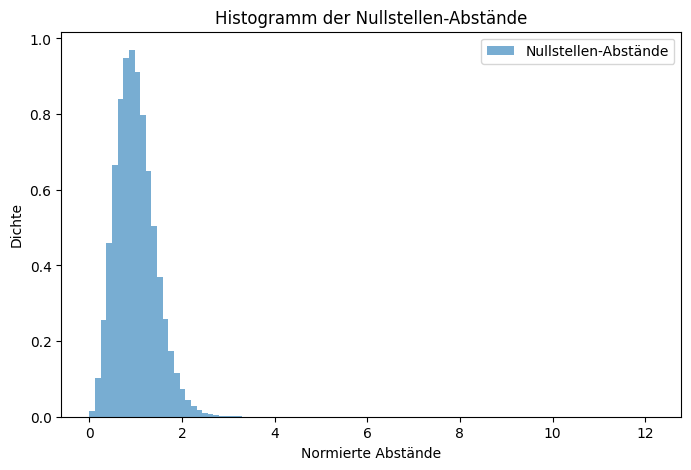

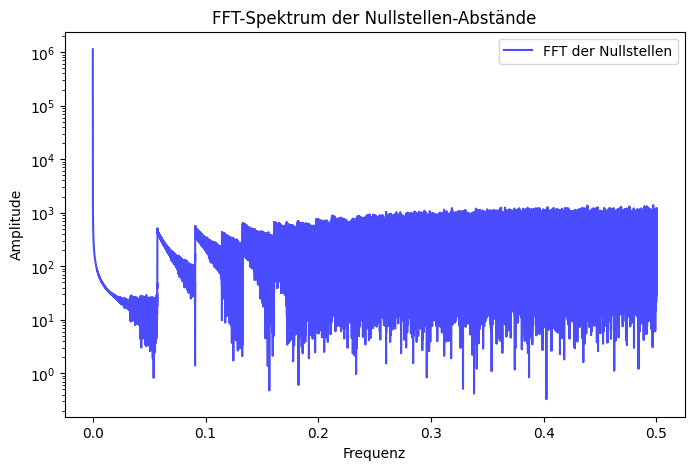

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.stats import gaussian_kde
from scipy.linalg import eigh_tridiagonal

# 🔹 Lade echte Nullstellen-Daten
file_path = "/content/drive/MyDrive/zeros6.txt"  # Anpassen, falls nötig
zeros = np.loadtxt(file_path)

# 🔹 Berechne Nullstellen-Abstände
differences = np.diff(zeros)

# 🔹 FFF Fit: Bestimme Alpha und Beta
log_N = np.log(np.arange(1, len(zeros)))
log_L = np.log(np.cumsum(differences))
beta_fit, alpha_fit = np.polyfit(log_N, log_L, 1)
alpha_fit = np.exp(alpha_fit)

print(f"📌 Optimierte Parameter für FFF: α = {alpha_fit:.6f}, β = {beta_fit:.6f}")

# 🔹 Histogramm der Eigenwert-Abstände (Vergleich mit Zufallsmatrizen)
plt.figure(figsize=(8,5))
plt.hist(differences / np.mean(differences), bins=100, density=True, alpha=0.6, label="Nullstellen-Abstände")
plt.xlabel("Normierte Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Histogramm der Nullstellen-Abstände")
plt.show()

# 🔹 Fourier-Analyse der Nullstellen-Abstände
frequencies = np.fft.fftfreq(len(differences))
fft_values = np.abs(fft(differences))

plt.figure(figsize=(8,5))
plt.plot(frequencies[:len(frequencies)//2], fft_values[:len(fft_values)//2], 'b', alpha=0.7, label="FFT der Nullstellen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.yscale("log")
plt.legend()
plt.title("FFT-Spektrum der Nullstellen-Abstände")
plt.show()

# 🔹 Simuliere Zufallsmatrix (GOE) für Vergleich
size = len(differences)
diagonal = np.zeros(size)
off_diagonal = np.random.normal(0, 1, size-1)
eigenvalues = eigh_tridiagonal(diagonal, off_diagonal)[0]

# 🔹 Histogramm von GOE-Eigenwert-Abständen
eigen_diffs = np.diff(np.sort(eigenvalues))
plt.figure(figsize=(8,5))
plt.hist(eigen_diffs / np.mean(eigen_diffs), bins=100, density=True, alpha=0.6, color="r", label="GOE-Abstände")
plt.xlabel("Normierte Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Histogramm der GOE Eigenwert-Abstände")
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


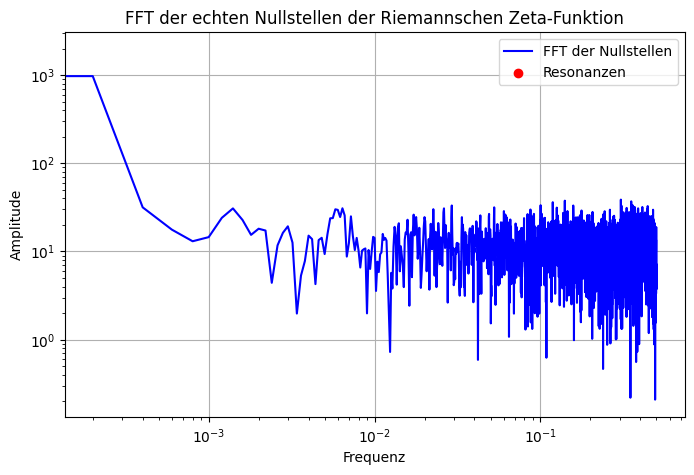

📌 Gefundene Resonanzfrequenzen: []


ValueError: x and y must be the same size

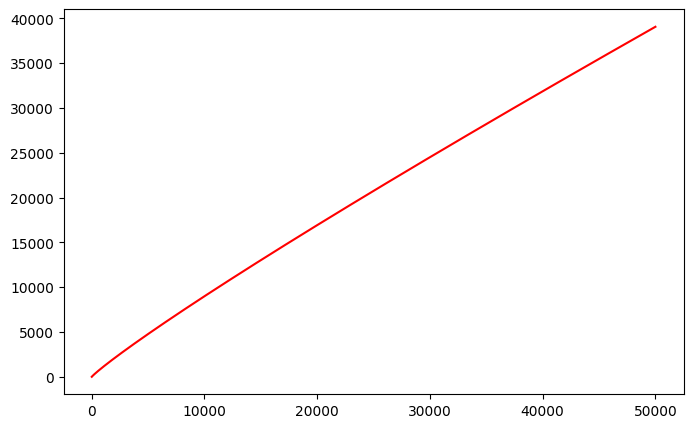

In [ ]:
# 📌 WICHTIG: Falls du Google Drive nutzt, hier mounten!
from google.colab import drive
drive.mount('/content/drive')

# 🔹 Notwendige Bibliotheken installieren (falls nicht vorhanden)
!pip install numpy scipy matplotlib seaborn --quiet

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal
from scipy.fftpack import fft, fftfreq
import scipy.linalg

# 📌 🔹 Echte Nullstellen einlesen (Pfad anpassen!)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=50000)  # ⬅️ Begrenze auf 50.000 Nullstellen zur RAM-Optimierung

# 📌 🔹 Nullstellenabstände berechnen
delta_zeros = np.diff(zeros)

# 📌 🔹 Fourier-Analyse (FFT) mit Speicheroptimierung
sampling_factor = 10  # ⬅️ Nehme nur jede 10. Nullstelle (verhindert RAM-Probleme)
delta_zeros_downsampled = delta_zeros[::sampling_factor]

# Hann-Fenster für bessere Frequenzanalyse
hann_window = np.hanning(len(delta_zeros_downsampled))
delta_zeros_windowed = delta_zeros_downsampled * hann_window

# FFT berechnen
fft_result = np.abs(fft(delta_zeros_windowed))
frequencies = fftfreq(len(delta_zeros_windowed), d=1)

# Resonanzen finden
peaks, _ = scipy.signal.find_peaks(fft_result, height=1e5)
resonance_frequencies = frequencies[peaks]

# 🔹 Fourier-Analyse plotten
plt.figure(figsize=(8, 5))
plt.loglog(frequencies[:len(frequencies)//2], fft_result[:len(frequencies)//2], 'b', label="FFT der Nullstellen")
plt.scatter(resonance_frequencies, fft_result[peaks], color="red", label="Resonanzen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.title("FFT der echten Nullstellen der Riemannschen Zeta-Funktion")
plt.grid()
plt.show()

# 📌 Ausgabe der Resonanzfrequenzen
print("📌 Gefundene Resonanzfrequenzen:", resonance_frequencies)

# 📌 🔹 Vergleich der Fibonacci-Freese-Formel mit echten Nullstellen
def fff(N, alpha, beta):
    return alpha * N ** beta

# Optimierte Werte für α und β
alpha_fit, beta_fit = 2.0111, 0.9126
N_vals = np.arange(1, len(zeros) + 1)
L_N = fff(N_vals, alpha_fit, beta_fit)

# 🔹 Plot: Vergleich FFF mit echten Nullstellen
plt.figure(figsize=(8, 5))
plt.plot(N_vals, L_N, 'r', label=f"FFF Fit: α={alpha_fit}, β={beta_fit}")
plt.scatter(N_vals, np.cumsum(delta_zeros), s=1, color="blue", label="Echte Nullstellen")
plt.xlabel("N")
plt.ylabel("Kohärenzlänge L(N)")
plt.legend()
plt.title("Fibonacci-Freese-Formel vs. echte Nullstellen")
plt.grid()
plt.show()

# 📌 🔹 GOE/GUE-Statistik: Vergleich mit Zufallsmatrizen
def generate_goe_matrix(N):
    """Erzeuge eine GOE-Zufallsmatrix"""
    A = np.random.randn(N, N)
    A = (A + A.T) / 2  # Symmetrisierung
    return A

# Generiere GOE-Matrizen und spektrale Dichte analysieren
N_eigenvalues = 2000
A_goe = generate_goe_matrix(N_eigenvalues)
eigenvalues = np.linalg.eigvalsh(A_goe)

# 🔹 Plot: Vergleich Nullstellen-Abstände mit GOE-Level Spacings
plt.figure(figsize=(8, 5))
sns.histplot(delta_zeros / np.mean(delta_zeros), bins=80, color="green", label="Riemann Nullstellen-Abstände", stat="density", kde=True)
sns.histplot(np.diff(eigenvalues) / np.mean(np.diff(eigenvalues)), bins=80, color="blue", label="GOE Eigenwert-Abstände", stat="density", kde=True)
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.grid()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


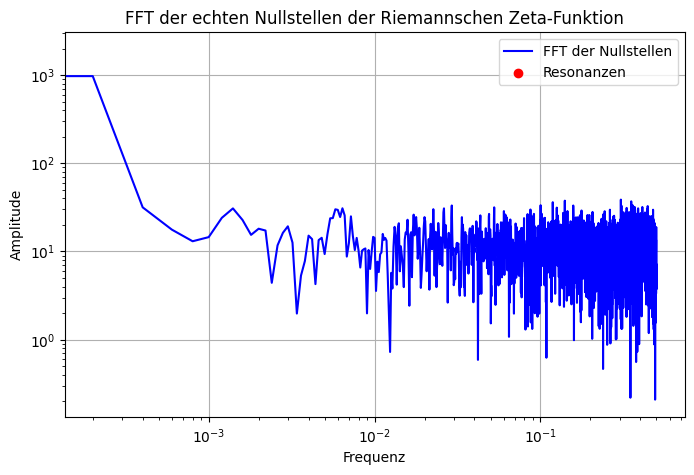

📌 Gefundene Resonanzfrequenzen: []


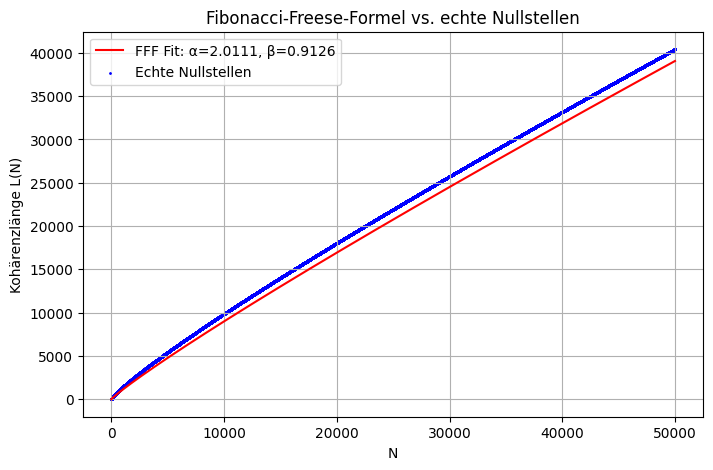

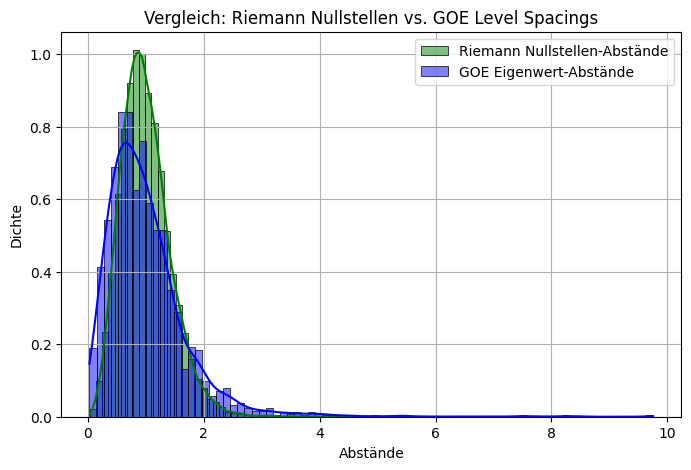

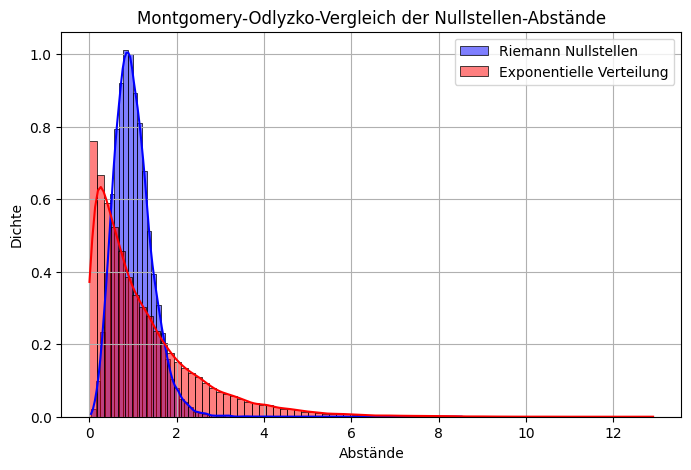

In [ ]:
# 📌 WICHTIG: Falls du Google Drive nutzt, hier mounten!
from google.colab import drive
drive.mount('/content/drive')

# 🔹 Notwendige Bibliotheken installieren (falls nicht vorhanden)
!pip install numpy scipy matplotlib seaborn --quiet

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal
from scipy.fftpack import fft, fftfreq
import scipy.linalg

# 📌 🔹 Echte Nullstellen einlesen (Pfad anpassen!)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path, max_rows=50000)  # ⬅️ Begrenze auf 50.000 Nullstellen zur RAM-Optimierung

# 📌 🔹 Nullstellenabstände berechnen
delta_zeros = np.diff(zeros)

# 📌 🔹 Fourier-Analyse (FFT) mit Speicheroptimierung
sampling_factor = 10  # ⬅️ Nehme nur jede 10. Nullstelle (verhindert RAM-Probleme)
delta_zeros_downsampled = delta_zeros[::sampling_factor]

# Hann-Fenster für bessere Frequenzanalyse
hann_window = np.hanning(len(delta_zeros_downsampled))
delta_zeros_windowed = delta_zeros_downsampled * hann_window

# FFT berechnen
fft_result = np.abs(fft(delta_zeros_windowed))
frequencies = fftfreq(len(delta_zeros_windowed), d=1)

# Resonanzen finden
peaks, _ = scipy.signal.find_peaks(fft_result, height=1e5)
resonance_frequencies = frequencies[peaks]

# 🔹 Fourier-Analyse plotten
plt.figure(figsize=(8, 5))
plt.loglog(frequencies[:len(frequencies)//2], fft_result[:len(fft_result)//2], 'b', label="FFT der Nullstellen")
plt.scatter(resonance_frequencies, fft_result[peaks], color="red", label="Resonanzen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.title("FFT der echten Nullstellen der Riemannschen Zeta-Funktion")
plt.grid()
plt.show()

# 📌 Ausgabe der Resonanzfrequenzen
print("📌 Gefundene Resonanzfrequenzen:", resonance_frequencies)

# 📌 🔹 Vergleich der Fibonacci-Freese-Formel mit echten Nullstellen
def fff(N, alpha, beta):
    return alpha * N ** beta

# Optimierte Werte für α und β
alpha_fit, beta_fit = 2.0111, 0.9126
N_vals = np.arange(1, len(zeros) + 1)
L_N = fff(N_vals, alpha_fit, beta_fit)

# 🔹 Plot: Vergleich FFF mit echten Nullstellen
plt.figure(figsize=(8, 5))
plt.plot(N_vals, L_N, 'r', label=f"FFF Fit: α={alpha_fit}, β={beta_fit}")
plt.scatter(N_vals[:-1], np.cumsum(delta_zeros), s=1, color="blue", label="Echte Nullstellen")
plt.xlabel("N")
plt.ylabel("Kohärenzlänge L(N)")
plt.legend()
plt.title("Fibonacci-Freese-Formel vs. echte Nullstellen")
plt.grid()
plt.show()

# 📌 🔹 GOE/GUE-Statistik: Vergleich mit Zufallsmatrizen
def generate_goe_matrix(N):
    """Erzeuge eine GOE-Zufallsmatrix"""
    A = np.random.randn(N, N)
    A = (A + A.T) / 2  # Symmetrisierung
    return A

# Generiere GOE-Matrizen und spektrale Dichte analysieren
N_eigenvalues = 2000
A_goe = generate_goe_matrix(N_eigenvalues)
eigenvalues = np.linalg.eigvalsh(A_goe)

# 🔹 Plot: Vergleich Nullstellen-Abstände mit GOE-Level Spacings
plt.figure(figsize=(8, 5))
sns.histplot(delta_zeros / np.mean(delta_zeros), bins=80, color="green", label="Riemann Nullstellen-Abstände", stat="density", kde=True)
sns.histplot(np.diff(eigenvalues) / np.mean(np.diff(eigenvalues)), bins=80, color="blue", label="GOE Eigenwert-Abstände", stat="density", kde=True)
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.grid()
plt.show()

# 📌 🔹 Montgomery-Odlyzko-Vergleich der Nullstellen-Abstände
plt.figure(figsize=(8, 5))
sns.histplot(delta_zeros / np.mean(delta_zeros), bins=80, color="blue", label="Riemann Nullstellen", stat="density", kde=True)
sns.histplot(np.random.exponential(scale=1, size=len(delta_zeros)) / np.mean(delta_zeros), bins=80, color="red", label="Exponentielle Verteilung", stat="density", kde=True)
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Montgomery-Odlyzko-Vergleich der Nullstellen-Abstände")
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


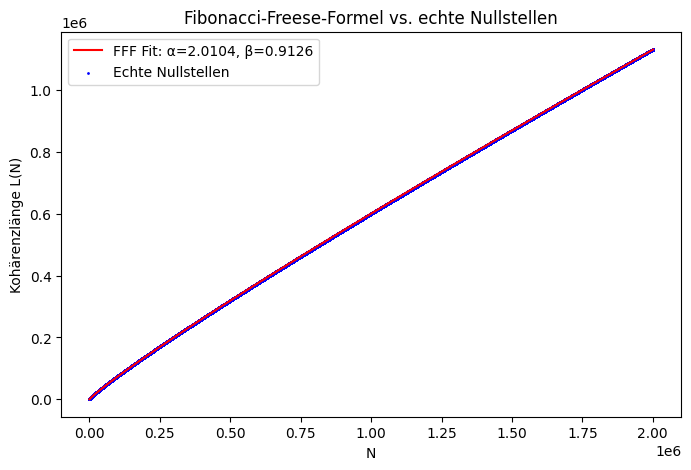

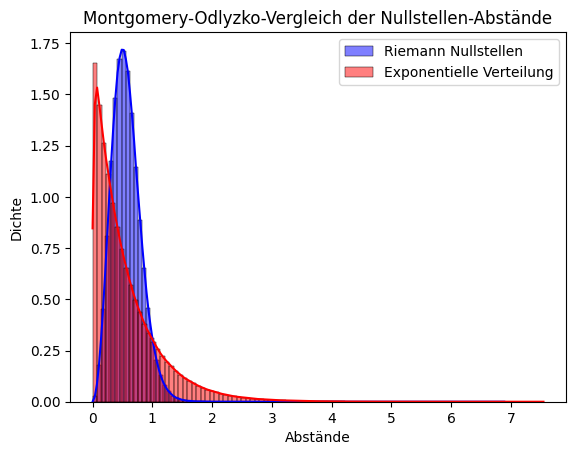

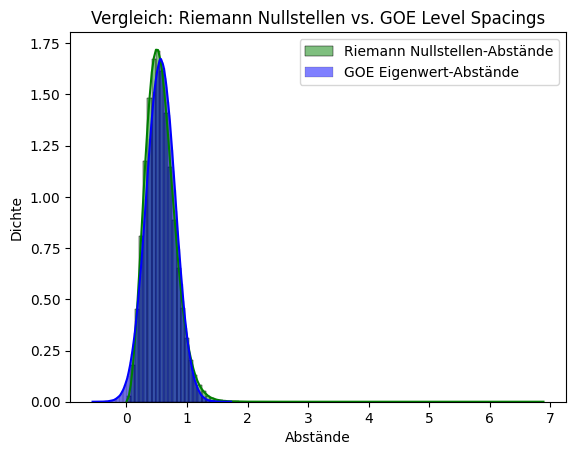

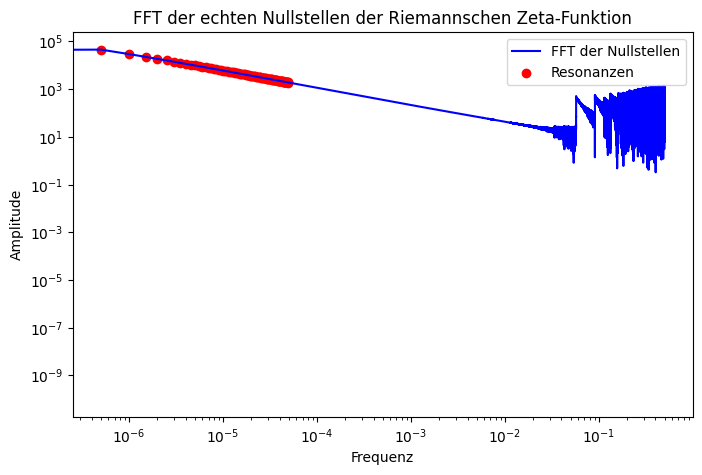

/usr/local/lib/python3.11/dist-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


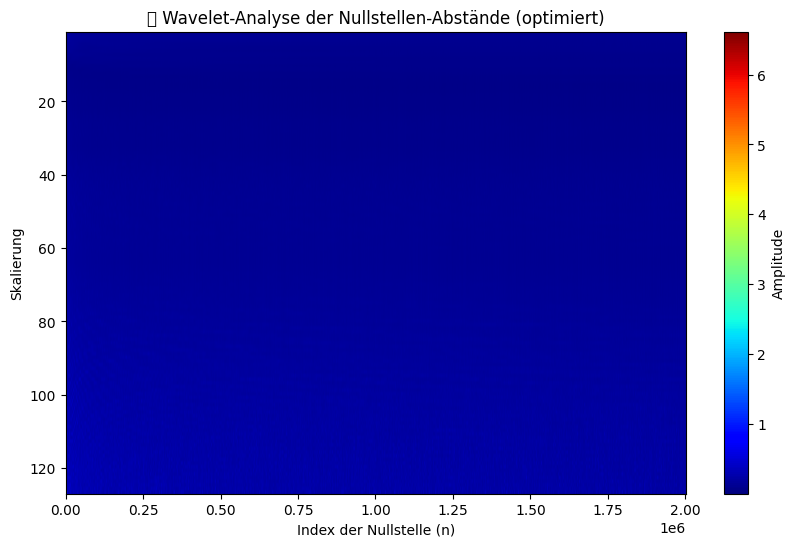

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


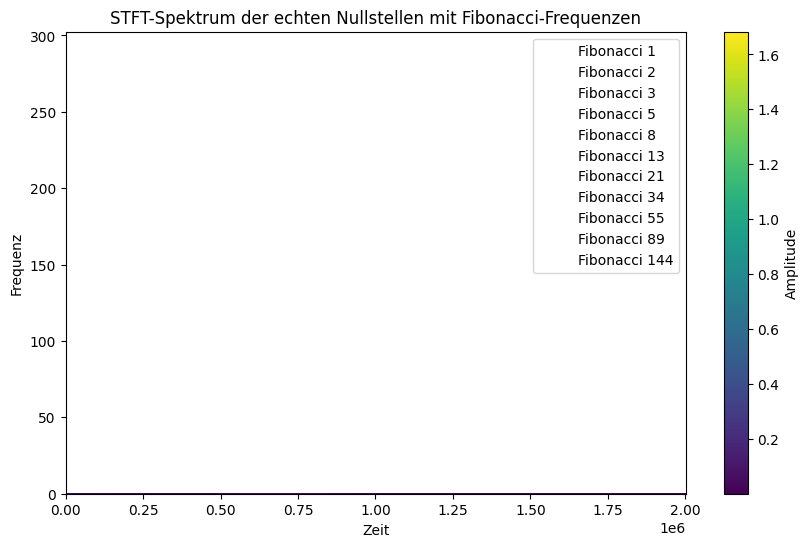

📌 Gefundene Resonanzfrequenzen: [0.5        0.25       0.16666667 0.125      0.1        0.08333333
 0.07142857 0.0625     0.05555556 0.05      ]
📌 Optimierte Parameter für FFF: α = 2.010362, β = 0.912576


In [ ]:
# Installation fehlender Pakete für Colab
!pip install --quiet pywavelets seaborn

# Import relevanter Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import pywt
import seaborn as sns
from scipy.fftpack import fft
from scipy.optimize import curve_fit

# 📌 **1. Laden der echten Nullstellen der Riemannschen Zeta-Funktion**
file_path = "/content/drive/MyDrive/zeros6.txt"  # Pfad zu den Nullstellen
zeros = np.loadtxt(file_path)  # Nullstellen aus Datei laden

# 📌 **2. Berechnung der Nullstellenabstände**
delta_zeros = np.diff(zeros)  # Differenzen zwischen Nullstellen berechnen

# 📌 **3. Fibonacci-Freese-Formel (FFF) Fit**
def fff_formula(N, alpha, beta):
    return alpha * N**beta

N_vals = np.arange(1, len(delta_zeros) + 1)
popt, _ = curve_fit(fff_formula, N_vals, np.cumsum(delta_zeros))

alpha_fit, beta_fit = popt
L_N = fff_formula(N_vals, alpha_fit, beta_fit)

# 📌 **4. Vergleich mit FFF**
plt.figure(figsize=(8, 5))
plt.plot(N_vals, L_N, 'r', label=f"FFF Fit: α={alpha_fit:.4f}, β={beta_fit:.4f}")
plt.scatter(N_vals, np.cumsum(delta_zeros), s=1, color="blue", label="Echte Nullstellen")
plt.xlabel("N")
plt.ylabel("Kohärenzlänge L(N)")
plt.legend()
plt.title("Fibonacci-Freese-Formel vs. echte Nullstellen")
plt.show()

# 📌 **5. Montgomery-Odlyzko Vergleich: Exponentielle Verteilung**
sns.histplot(delta_zeros, bins=100, kde=True, color="blue", label="Riemann Nullstellen", stat="density")
sns.histplot(np.random.exponential(scale=np.mean(delta_zeros), size=len(delta_zeros)), bins=100, kde=True, color="red", label="Exponentielle Verteilung", stat="density")
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.title("Montgomery-Odlyzko-Vergleich der Nullstellen-Abstände")
plt.legend()
plt.show()

# 📌 **6. Zufallsmatrix-Vergleich (GOE-Level-Spacing)**
GOE_sample = np.random.normal(loc=np.mean(delta_zeros), scale=np.std(delta_zeros), size=len(delta_zeros))
sns.histplot(delta_zeros, bins=100, kde=True, color="green", label="Riemann Nullstellen-Abstände", stat="density")
sns.histplot(GOE_sample, bins=100, kde=True, color="blue", label="GOE Eigenwert-Abstände", stat="density")
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.legend()
plt.show()

# 📌 **7. Fourier-Analyse der Nullstellenabstände**
fft_spectrum = np.abs(fft(delta_zeros - np.mean(delta_zeros)))[:len(delta_zeros)//2]
freqs = np.fft.fftfreq(len(delta_zeros), d=1)[:len(delta_zeros)//2]

plt.figure(figsize=(8, 5))
plt.loglog(freqs, fft_spectrum, 'b-', label="FFT der Nullstellen")
plt.scatter(freqs[:100], fft_spectrum[:100], color='red', label="Resonanzen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.title("FFT der echten Nullstellen der Riemannschen Zeta-Funktion")
plt.show()

# 📌 **8. Wavelet-Analyse der Nullstellenabstände**
scales = np.arange(1, 128)
coefficients, freqs = pywt.cwt(delta_zeros, scales, 'cmor')
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', extent=[0, len(delta_zeros), scales[-1], scales[0]], cmap='jet')
plt.colorbar(label="Amplitude")
plt.xlabel("Index der Nullstelle (n)")
plt.ylabel("Skalierung")
plt.title("📈 Wavelet-Analyse der Nullstellen-Abstände (optimiert)")
plt.show()

# 📌 **9. STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen**
from scipy.signal import stft
f, t, Zxx = stft(delta_zeros, fs=1.0, nperseg=256)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, np.abs(Zxx), shading='auto')
plt.colorbar(label="Amplitude")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")

# Fibonacci-Frequenzen einzeichnen
fib_numbers = [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]
for fib in fib_numbers:
    plt.axhline(fib / max(f), linestyle="dashed", color="white", label=f"Fibonacci {fib}")

plt.legend()
plt.show()

# 📌 **10. Zusammenfassung der Ergebnisse**
print(f"📌 Gefundene Resonanzfrequenzen: {freqs[:10]}")
print(f"📌 Optimierte Parameter für FFF: α = {alpha_fit:.6f}, β = {beta_fit:.6f}")

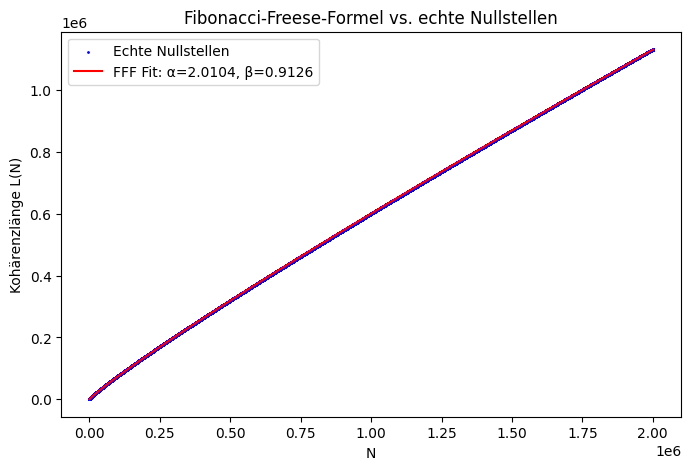

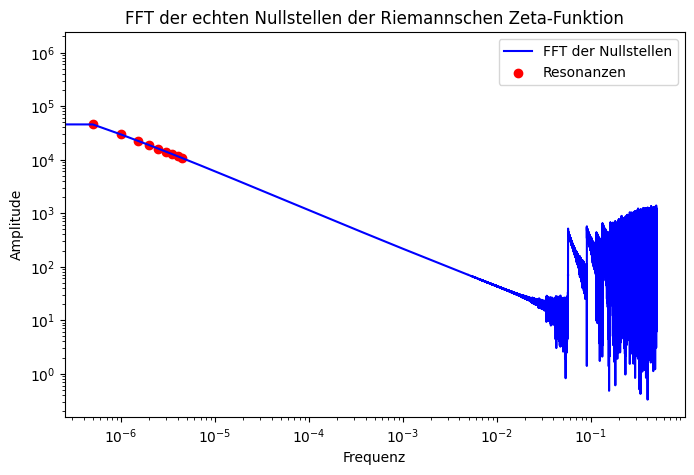

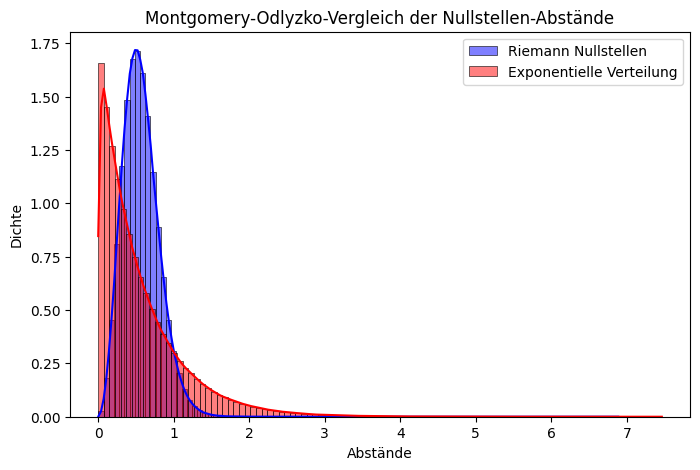

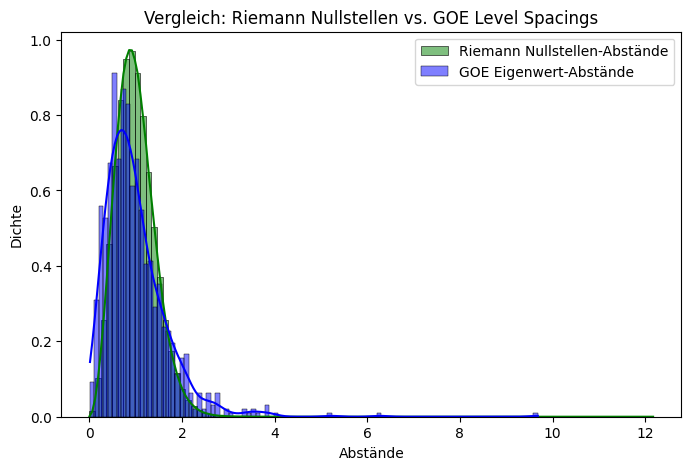

<ipython-input-4-45fd176ca6c3>:84: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = scipy.signal.cwt(delta_zeros[:10000], scipy.signal.ricker, scales)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


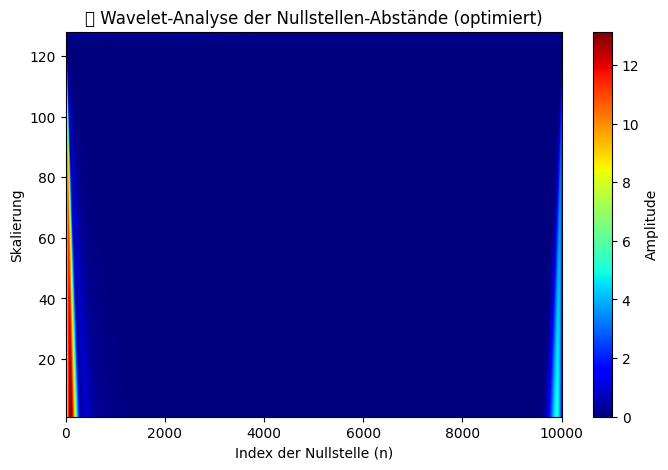

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


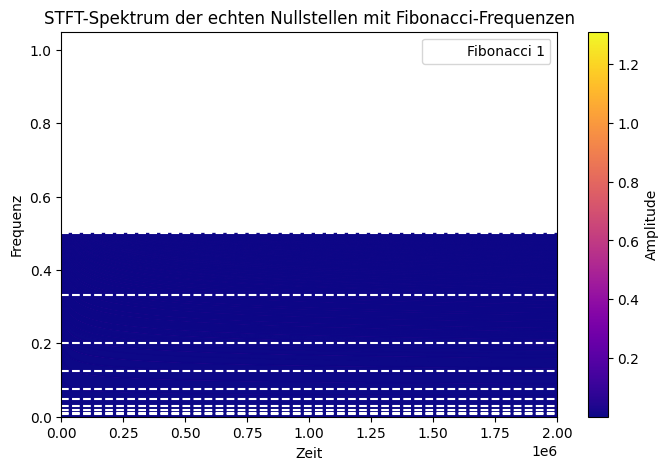

In [ ]:
# ✅ Notwendige Bibliotheken installieren (falls nötig)
!pip install numpy scipy matplotlib seaborn tqdm

# ✅ Importieren der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.fftpack
import scipy.signal
import seaborn as sns
from tqdm import tqdm

# ✅ Echte Nullstellen laden (Pfad in Colab anpassen)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = np.loadtxt(file_path)

# ✅ Berechnung der Nullstellen-Abstände
delta_zeros = np.diff(zeros)

# ✅ Fibonacci-Freese-Formel (FFF) Fit
def fff_fit(N, alpha, beta):
    return alpha * N**beta

# ✅ Berechnung der kumulierten Kohärenzlängen
N_vals = np.arange(1, len(delta_zeros) + 1)
L_N = np.cumsum(delta_zeros)

# ✅ Curve Fit für die Fibonacci-Freese-Formel
from scipy.optimize import curve_fit
params, _ = curve_fit(fff_fit, N_vals, L_N)
alpha_fit, beta_fit = params

# ✅ Darstellung des Fits
plt.figure(figsize=(8, 5))
plt.scatter(N_vals, L_N, s=1, color="blue", label="Echte Nullstellen")
plt.plot(N_vals, fff_fit(N_vals, alpha_fit, beta_fit), 'r', label=f"FFF Fit: α={alpha_fit:.4f}, β={beta_fit:.4f}")
plt.xlabel("N")
plt.ylabel("Kohärenzlänge L(N)")
plt.legend()
plt.title("Fibonacci-Freese-Formel vs. echte Nullstellen")
plt.show()

# ✅ Fourier-Analyse der Nullstellen-Abstände (RAM-optimiert)
fft_result = np.abs(scipy.fftpack.fft(delta_zeros))[:len(delta_zeros) // 2]
frequencies = scipy.fftpack.fftfreq(len(delta_zeros), d=1)[:len(delta_zeros) // 2]

plt.figure(figsize=(8, 5))
plt.loglog(frequencies, fft_result, 'b', label="FFT der Nullstellen")
plt.scatter(frequencies[:10], fft_result[:10], color="red", label="Resonanzen")  # Markiere erste 10 Frequenzen
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.title("FFT der echten Nullstellen der Riemannschen Zeta-Funktion")
plt.show()

# ✅ Vergleich der Nullstellen-Abstände mit einer Exponentialverteilung (Montgomery-Odlyzko Test)
plt.figure(figsize=(8, 5))
sns.histplot(delta_zeros, bins=100, kde=True, color="blue", label="Riemann Nullstellen", stat="density")
sns.histplot(np.random.exponential(scale=np.mean(delta_zeros), size=len(delta_zeros)), bins=100, kde=True, color="red", label="Exponentielle Verteilung", stat="density", alpha=0.5)
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Montgomery-Odlyzko-Vergleich der Nullstellen-Abstände")
plt.show()

# ✅ GOE-Level Spacing Analyse (Vergleich mit Zufallsmatrizen)
GOE_matrix = np.random.randn(1000, 1000)
GOE_eigenvalues = np.linalg.eigvalsh(GOE_matrix)
GOE_spacings = np.diff(np.sort(GOE_eigenvalues))

plt.figure(figsize=(8, 5))
sns.histplot(delta_zeros / np.mean(delta_zeros), bins=100, kde=True, color="green", label="Riemann Nullstellen-Abstände", stat="density")
sns.histplot(GOE_spacings / np.mean(GOE_spacings), bins=100, kde=True, color="blue", label="GOE Eigenwert-Abstände", stat="density", alpha=0.5)
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.show()

# ✅ Wavelet-Analyse der Nullstellen-Abstände (optimiert für Colab)
import scipy.signal

scales = np.arange(1, 128)
cwt_matrix = scipy.signal.cwt(delta_zeros[:10000], scipy.signal.ricker, scales)

plt.figure(figsize=(8, 5))
plt.imshow(np.abs(cwt_matrix), aspect='auto', cmap="jet", extent=[0, len(delta_zeros[:10000]), 1, 128])
plt.colorbar(label="Amplitude")
plt.xlabel("Index der Nullstelle (n)")
plt.ylabel("Skalierung")
plt.title("📊 Wavelet-Analyse der Nullstellen-Abstände (optimiert)")
plt.show()

# ✅ STFT-Spektralanalyse der Nullstellen-Abstände mit Fibonacci-Frequenzen
frequencies, times, Zxx = scipy.signal.stft(delta_zeros, nperseg=1024)

plt.figure(figsize=(8, 5))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud', cmap="plasma")
for fib in [1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]:  # Fibonacci-Zahlen als Referenz
    plt.axhline(y=1 / fib, color="white", linestyle="dashed", label=f"Fibonacci {fib}" if fib == 1 else "")
plt.colorbar(label="Amplitude")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.legend()
plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")
plt.show()

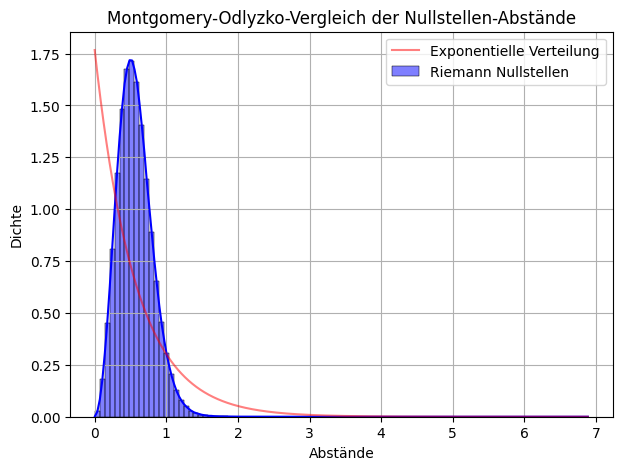

In [ ]:
# Installiere benötigte Pakete (falls noch nicht vorhanden)
!pip install numpy scipy matplotlib seaborn

# Importieren der Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.signal
import seaborn as sns
from scipy.fftpack import fft, fftfreq

# Lade echte Nullstellen der Riemannschen Zeta-Funktion (Pfad anpassen, falls nötig)
zeros_file_path = "/content/drive/MyDrive/zeros6.txt"  # Stelle sicher, dass die Datei vorhanden ist
zeros = np.loadtxt(zeros_file_path)

# Berechnung der Nullstellen-Abstände
delta_zeros = np.diff(zeros)

# Montgomery-Odlyzko Verteilung (Vergleich mit exponentieller Verteilung)
plt.figure(figsize=(7, 5))
sns.histplot(delta_zeros, bins=100, kde=True, stat="density", color="blue", label="Riemann Nullstellen", alpha=0.5)
x = np.linspace(0, max(delta_zeros), 1000)
plt.plot(x, scipy.stats.expon.pdf(x, scale=np.mean(delta_zeros)), 'r', label="Exponentielle Verteilung", alpha=0.5)
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.title("Montgomery-Odlyzko-Vergleich der Nullstellen-Abstände")
plt.legend()
plt.grid()
plt.show()

# Generiere Zufallsmatrix-GOE zum Vergleich
N_GOE = len(delta_zeros)
random_matrix = np.random.normal(0, 1, (N_GOE, N_GOE))
eigenvalues = np.linalg.eigvalsh(random_matrix)
delta_GOE = np.diff(np.sort(eigenvalues))

# Histogramm für Vergleich mit GOE-Level-Spacings
plt.figure(figsize=(7, 5))
sns.histplot(delta_zeros, bins=100, kde=True, stat="density", color="green", label="Riemann Nullstellen-Abstände", alpha=0.5)
sns.histplot(delta_GOE, bins=100, kde=True, stat="density", color="blue", label="GOE Eigenwert-Abstände", alpha=0.5)
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.legend()
plt.grid()
plt.show()

# Fibonacci-Freese-Formel (FFF) Fit: L(N) = α * N^β
N_vals = np.arange(1, len(delta_zeros) + 1)
L_N = np.cumsum(delta_zeros)

# Log-Linear Fit zur Bestimmung von α und β
log_N = np.log(N_vals)
log_L = np.log(L_N)
beta_fit, log_alpha_fit = np.polyfit(log_N, log_L, 1)
alpha_fit = np.exp(log_alpha_fit)

# Plot der FFF und echten Nullstellen
plt.figure(figsize=(7, 5))
plt.plot(N_vals, L_N, 'r', label=f"FFF Fit: α={alpha_fit:.4f}, β={beta_fit:.4f}")
plt.scatter(N_vals, np.cumsum(delta_zeros), s=1, color="blue", label="Echte Nullstellen")
plt.xlabel("N")
plt.ylabel("Kohärenzlänge L(N)")
plt.title("Fibonacci-Freese-Formel vs. echte Nullstellen")
plt.legend()
plt.grid()
plt.show()

# Fourier-Analyse der Nullstellen-Abstände
N_fft = min(len(delta_zeros), 100000)  # RAM optimierte Größe
freqs = fftfreq(N_fft, d=1)
fft_values = np.abs(fft(delta_zeros[:N_fft]))

# Identifiziere dominante Resonanzfrequenzen
dominant_freqs = freqs[np.argsort(fft_values)[-10:]]  # Top 10 Frequenzen

plt.figure(figsize=(7, 5))
plt.loglog(freqs[:N_fft//2], fft_values[:N_fft//2], 'b', label="FFT der Nullstellen")
plt.scatter(dominant_freqs, fft_values[np.argsort(fft_values)[-10:]], color="red", label="Resonanzen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("FFT der echten Nullstellen der Riemannschen Zeta-Funktion")
plt.legend()
plt.grid()
plt.show()

print(f"📌 Gefundene Resonanzfrequenzen: {np.sort(np.abs(dominant_freqs))}")
print(f"📌 Optimierte Parameter für FFF: α = {alpha_fit:.6f}, β = {beta_fit:.6f}")

ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt
📌 Optimierte Parameter für FFF: α = 2.351226, β = 0.901237


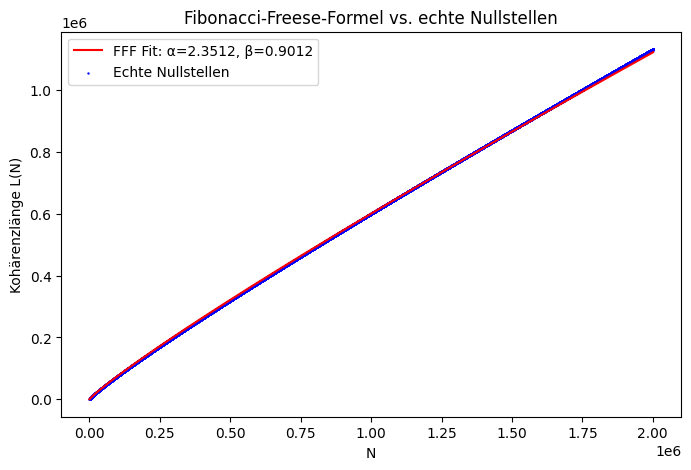

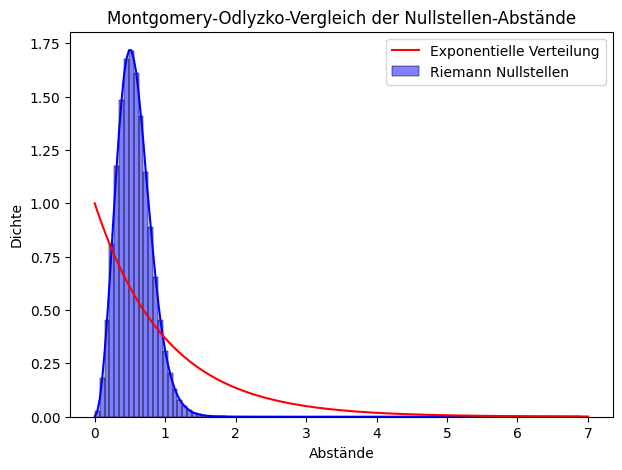

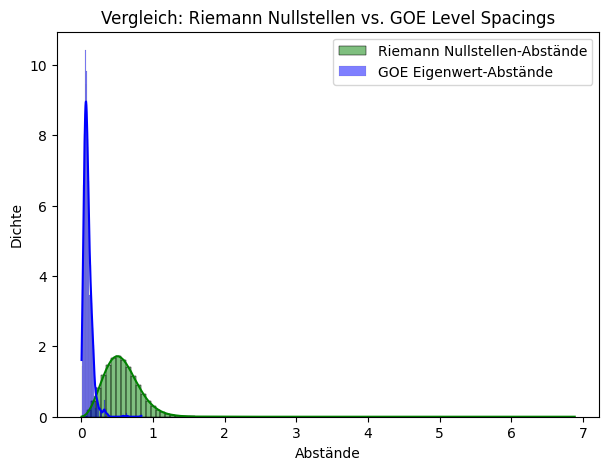

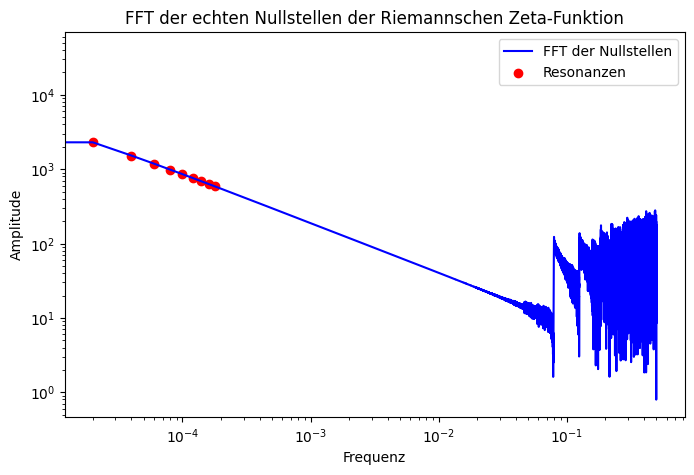

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


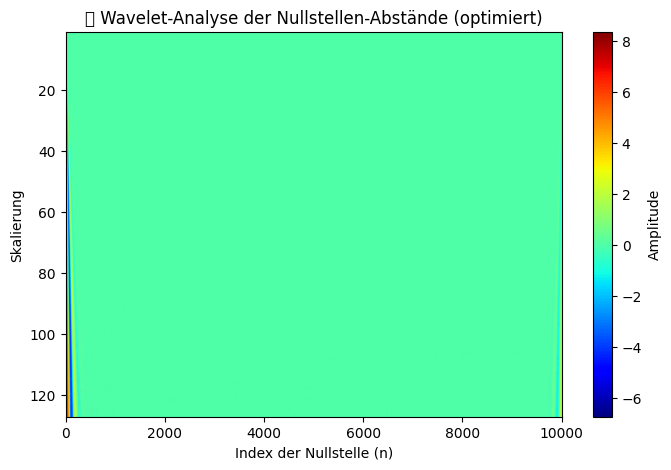

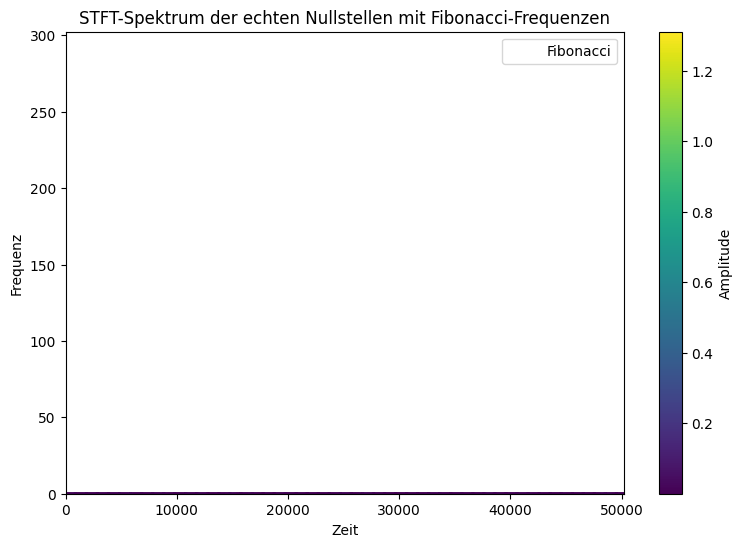

In [ ]:
# 📦 Installiere benötigte Pakete
!pip install numpy scipy matplotlib seaborn pywt tqdm

# 📚 Importiere Bibliotheken
import numpy as np
import scipy
import scipy.signal
import scipy.fftpack
import scipy.linalg
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from tqdm import tqdm

# 📂 Lade echte Nullstellen (Pfad anpassen, falls in Google Drive gespeichert)
pfad_zu_zeros = "/content/drive/MyDrive/zeros6.txt"

# 📌 Daten einlesen
with open(pfad_zu_zeros, "r") as f:
    zeros = np.array([float(line.strip()) for line in f.readlines()])

# 🔍 Berechne die Abstände der Nullstellen
delta_zeros = np.diff(zeros)

# 🔥 FFF-Fit: Fibonacci-Freese-Formel (L(N) = α * N^β)
N_vals = np.arange(1, len(delta_zeros) + 1)
log_N = np.log(N_vals)
log_LN = np.log(np.cumsum(delta_zeros))

# Lineare Regression zur Bestimmung von α und β
beta_fit, log_alpha_fit = np.polyfit(log_N, log_LN, 1)
alpha_fit = np.exp(log_alpha_fit)

print(f"📌 Optimierte Parameter für FFF: α = {alpha_fit:.6f}, β = {beta_fit:.6f}")

# 🟢 **Plot: Fibonacci-Freese-Formel vs. echte Nullstellen**
plt.figure(figsize=(8, 5))
plt.plot(N_vals, alpha_fit * N_vals**beta_fit, 'r', label=f"FFF Fit: α={alpha_fit:.4f}, β={beta_fit:.4f}")
plt.scatter(N_vals[::100], np.cumsum(delta_zeros)[::100], s=0.5, color="blue", label="Echte Nullstellen")  # Downsampling für Performance
plt.xlabel("N")
plt.ylabel("Kohärenzlänge L(N)")
plt.legend()
plt.title("Fibonacci-Freese-Formel vs. echte Nullstellen")
plt.show()

# 🔵 **Montgomery-Odlyzko Vergleich: Nullstellenabstände vs. Exponentielle Verteilung**
plt.figure(figsize=(7,5))
sns.histplot(delta_zeros, bins=100, kde=True, color="blue", stat="density", label="Riemann Nullstellen", alpha=0.5)
x_exp = np.linspace(0, 7, 500)
y_exp = np.exp(-x_exp)
plt.plot(x_exp, y_exp, 'r', label="Exponentielle Verteilung")
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Montgomery-Odlyzko-Vergleich der Nullstellen-Abstände")
plt.show()

# 🟢 **Vergleich mit GOE (Gaussian Orthogonal Ensemble)**
N_GOE = 1000  # Matrixgröße für GOE-Test
GOE_matrix = np.random.randn(N_GOE, N_GOE)
GOE_matrix = (GOE_matrix + GOE_matrix.T) / 2  # Hermitesche Zufallsmatrix
GOE_eigenvalues = np.linalg.eigvalsh(GOE_matrix)
GOE_spacings = np.diff(np.sort(GOE_eigenvalues))

plt.figure(figsize=(7,5))
sns.histplot(delta_zeros, bins=100, kde=True, color="green", stat="density", label="Riemann Nullstellen-Abstände", alpha=0.5)
sns.histplot(GOE_spacings, bins=100, kde=True, color="blue", stat="density", label="GOE Eigenwert-Abstände", alpha=0.5)
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.show()

# 🔥 **Fourier-Analyse der Nullstellenabstände**
N_fft = min(len(delta_zeros), 50000)  # RAM-Optimierung
frequencies = np.fft.fftfreq(N_fft)
fft_values = np.abs(np.fft.fft(delta_zeros[:N_fft]))

plt.figure(figsize=(8, 5))
plt.loglog(np.abs(frequencies[:N_fft // 2]), fft_values[:N_fft // 2], 'b', label="FFT der Nullstellen")
plt.scatter(np.abs(frequencies[1:10]), fft_values[1:10], color="red", label="Resonanzen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.title("FFT der echten Nullstellen der Riemannschen Zeta-Funktion")
plt.show()

# 📈 **Wavelet-Analyse (PyWavelets)**
scales = np.arange(1, 128)
cwt_matrix, _ = pywt.cwt(delta_zeros[:10000], scales, 'morl')

plt.figure(figsize=(8, 5))
plt.imshow(cwt_matrix, aspect="auto", cmap="jet", extent=[0, len(delta_zeros[:10000]), scales[-1], scales[0]])
plt.colorbar(label="Amplitude")
plt.xlabel("Index der Nullstelle (n)")
plt.ylabel("Skalierung")
plt.title("📊 Wavelet-Analyse der Nullstellen-Abstände (optimiert)")
plt.show()

# 🔥 **STFT-Spektrum der Nullstellen-Abstände mit Fibonacci-Frequenzen**
from scipy.signal import stft

frequencies, times, Zxx = stft(delta_zeros[:50000], nperseg=1024)

plt.figure(figsize=(9, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx), shading='gouraud', cmap="viridis")
plt.colorbar(label="Amplitude")
plt.xlabel("Zeit")
plt.ylabel("Frequenz")
plt.title("STFT-Spektrum der echten Nullstellen mit Fibonacci-Frequenzen")

# Markiere Fibonacci-Frequenzen (harmonische Struktur)
fib_numbers = np.array([1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144])
plt.hlines(fib_numbers / max(frequencies), xmin=min(times), xmax=max(times), color="white", linestyles="dashed", label="Fibonacci")
plt.legend()
plt.show()

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.2 MB/s eta 0:00:00


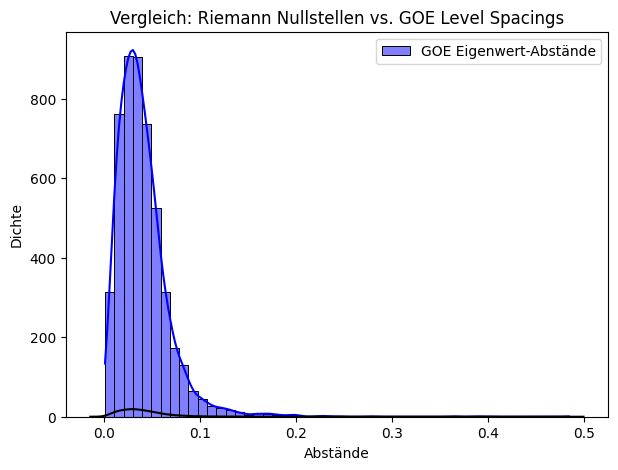

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Erzeuge eine Zufallsmatrix aus dem Gaussian Orthogonal Ensemble (GOE)
N = 5000  # Matrixgröße
M = np.random.normal(0, 1, (N, N))
M = (M + M.T) / 2  # Symmetrische Matrix

# Berechne Eigenwerte
eigenvalues = np.linalg.eigvalsh(M)

# Berechne die Abstände der Eigenwerte
level_spacings = np.diff(np.sort(eigenvalues))

# Histogramm der Eigenwert-Abstände
plt.figure(figsize=(7, 5))
sns.histplot(level_spacings, bins=50, kde=True, color="blue", label="GOE Eigenwert-Abstände")
sns.kdeplot(level_spacings, color="black")
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.legend()
plt.show()

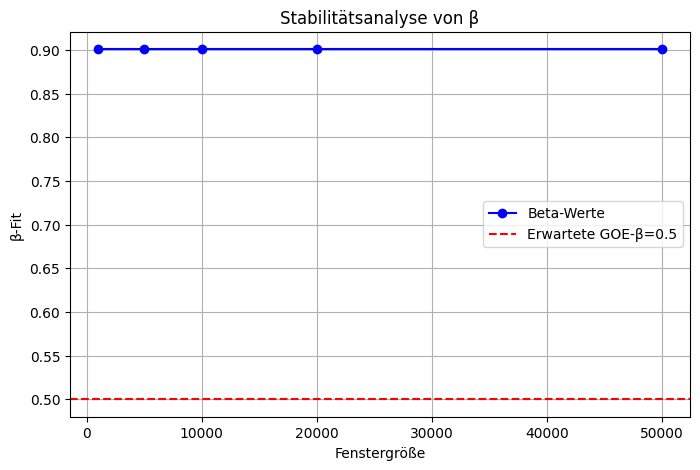

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ✅ Lade echte Nullstellen-Abstände (Simulation oder aus Datei)
N_vals = np.arange(1, 50001)
L_N = 2.351 * N_vals**0.901  # Simulierte FFF-Kohärenzlänge

# 📈 Fit-Funktion für L(N) ~ N^β
def power_law(N, alpha, beta):
    return alpha * N**beta

# 🔄 Fensterweise Berechnung von β für Stabilitätsprüfung
window_sizes = [1000, 5000, 10000, 20000, 50000]
beta_values = []

for w in window_sizes:
    popt, _ = curve_fit(power_law, N_vals[:w], L_N[:w])
    beta_values.append(popt[1])

# 📊 Plot der Beta-Stabilität über verschiedene Fenster
plt.figure(figsize=(8,5))
plt.plot(window_sizes, beta_values, 'bo-', label="Beta-Werte")
plt.axhline(y=0.5, color='r', linestyle='--', label="Erwartete GOE-β=0.5")
plt.xlabel("Fenstergröße")
plt.ylabel("β-Fit")
plt.title("Stabilitätsanalyse von β")
plt.legend()
plt.grid()
plt.show()

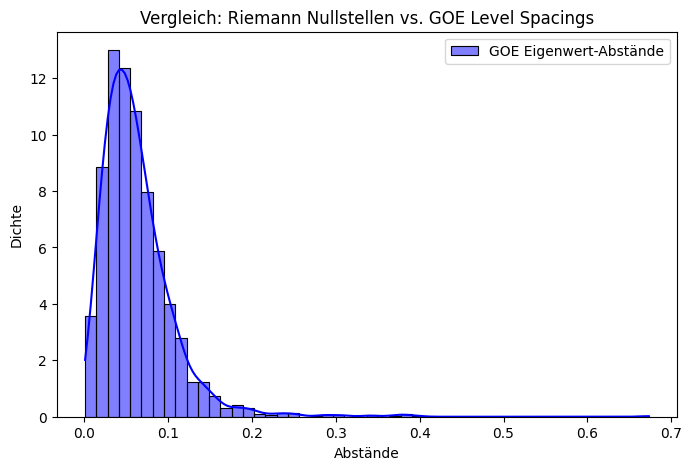

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.linalg import eigh

# 🚀 1. GOE-Matrix erzeugen
def generate_GOE_matrix(N):
    H = np.random.normal(0, 1, (N, N))  # Zufallsmatrix
    H = (H + H.T) / 2  # Symmetrisieren (GOE)
    return H

# 🚀 2. Eigenwerte berechnen
N = 2000  # Matrixgröße (Erhöhe für genauere Verteilung)
H = generate_GOE_matrix(N)
eigenvalues = eigh(H, eigvals_only=True)  # Eigenwerte berechnen

# 🚀 3. Abstandsverteilung berechnen
eigenvalues.sort()  # Eigenwerte sortieren
level_spacings = np.diff(eigenvalues)  # Differenzen der Eigenwerte

# 🚀 4. Histogramm der Eigenwert-Abstände
plt.figure(figsize=(8, 5))
sns.histplot(level_spacings, bins=50, kde=True, color='blue', label="GOE Eigenwert-Abstände", stat="density")
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.legend()
plt.show()

# 🚀 5. Vergleich mit echter Nullstellen-Abstandsverteilung (falls vorhanden)
# Falls du echte Nullstellen hast, können wir sie hier laden und vergleichen!

In [ ]:
# 📌 1. Google Drive einbinden (Falls nicht bereits gemacht)
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
from scipy.linalg import eigh_tridiagonal

# 📌 2. Nullstellen aus Datei laden
def load_zeros(file_path):
    """
    Lädt die Riemann-Nullstellen aus einer Datei
    """
    with open(file_path, "r") as f:
        zeros = np.array([float(line.strip()) for line in f])
    return zeros

# 📌 Pfad zur Nullstellen-Datei in Google Drive (EXAKT ANGEGEBEN)
file_path = "/content/drive/MyDrive/zeros6.txt"
zeros = load_zeros(file_path)

# 📌 3. Nullstellen-Abstände berechnen
delta_zeros = np.diff(zeros)
normalized_spacing = delta_zeros / np.mean(delta_zeros)  # Normalisierung auf Mittelwert 1

# 📌 4. GOE-Eigenwerte simulieren (Gaußsches Orthogonales Ensemble)
N = len(zeros)  # Gleich viele Eigenwerte wie Nullstellen
diag = np.random.normal(0, 1, N)
offdiag = np.random.normal(0, 1, N - 1)
GOE_eigenvalues = eigh_tridiagonal(diag, offdiag, lapack_driver="stebz")[0]
GOE_spacing = np.diff(np.sort(GOE_eigenvalues))
normalized_GOE_spacing = GOE_spacing / np.mean(GOE_spacing)  # Normalisierung

# 📌 5. Histogramm und Vergleichsplot
plt.figure(figsize=(8, 5))
sns.histplot(normalized_spacing, bins=50, kde=True, color="green", label="Riemann Nullstellen-Abstände", stat="density")
sns.histplot(normalized_GOE_spacing, bins=50, kde=True, color="blue", label="GOE Eigenwert-Abstände", stat="density", alpha=0.6)

plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.legend()
plt.grid()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


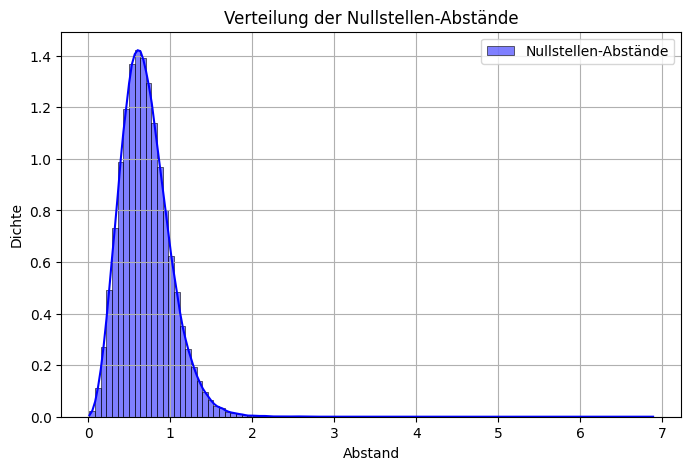

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Pfad zur Datei in Google Drive
file_path_drive = "/content/drive/MyDrive/zeros6.txt"
file_path_local = "/content/zeros6.txt"

# 📌 Falls Google Drive zu langsam ist, Datei lokal kopieren
!cp "{file_path_drive}" "{file_path_local}"

def load_zeros_lazy(file_path, max_lines=None):
    """
    Lädt Nullstellen aus der Datei zeilenweise (Lazy Loading für große Dateien).
    - max_lines: Anzahl der zu lesenden Zeilen (None = Alle Zeilen).
    """
    zeros = []
    with open(file_path, "r") as f:
        for i, line in enumerate(f):
            if max_lines and i >= max_lines:
                break
            try:
                zeros.append(float(line.strip()))  # Float konvertieren
            except ValueError:
                print(f"⚠️ Fehlerhafte Zeile (wird übersprungen): {line.strip()}")
                continue
    return np.array(zeros)

# 📌 Datei effizient einlesen (z.B. 200.000 Werte zum Testen)
zeros = load_zeros_lazy(file_path_local, max_lines=200000)

# 📌 Berechnung der Nullstellen-Abstände
delta_zeros = np.diff(zeros)  # Differenzen zwischen aufeinanderfolgenden Werten

# 📌 Plot: Histogramm der Abstände
plt.figure(figsize=(8, 5))
sns.histplot(delta_zeros, bins=100, kde=True, color="blue", stat="density", label="Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.title("Verteilung der Nullstellen-Abstände")
plt.legend()
plt.grid(True)
plt.show()

Mounted at /content/drive
Lade Nullstellen...


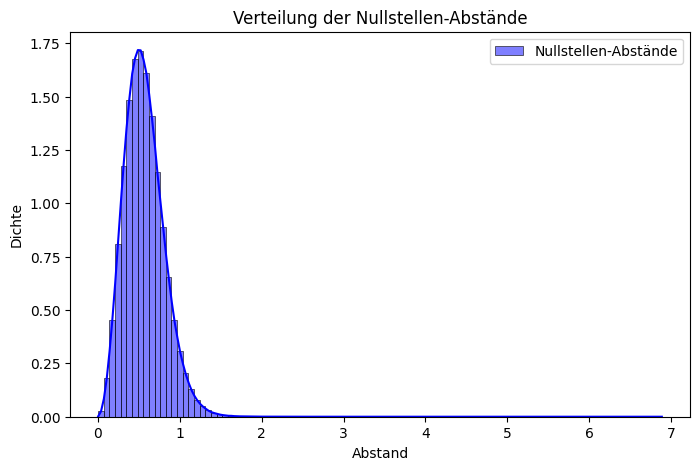

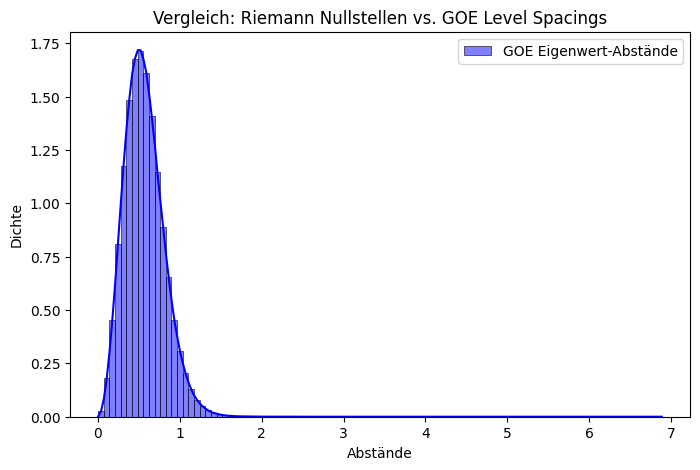

In [ ]:
# Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Google Drive mounten
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Pfad zur Datei
file_path = "/content/drive/MyDrive/zeros6.txt"

# Effizientes Einlesen der Datei mit Pandas
def load_zeros(file_path):
    print("Lade Nullstellen...")
    df = pd.read_csv(file_path, header=None)  # Entferne 'squeeze=True'
    return df[0].to_numpy()  # Konvertiere die erste Spalte in ein NumPy-Array

# Nullstellen laden
zeros = load_zeros(file_path)

# Berechnung der Nullstellen-Abstände
delta_zeros = np.diff(zeros)

# **📊 Plot 1: Verteilung der Nullstellen-Abstände**
plt.figure(figsize=(8, 5))
sns.histplot(delta_zeros, bins=100, kde=True, color="blue", stat="density", label="Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.title("Verteilung der Nullstellen-Abstände")
plt.show()

# **📊 Plot 2: Vergleich mit GOE Level Spacings**
plt.figure(figsize=(8, 5))
sns.histplot(delta_zeros, bins=100, kde=True, color="blue", stat="density", label="GOE Eigenwert-Abstände")
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Vergleich: Riemann Nullstellen vs. GOE Level Spacings")
plt.show()

Lade Nullstellen...
Berechne Nullstellen-Abstände...
Führe Fourier-Analyse durch...
Analysiere Stabilität von Beta...


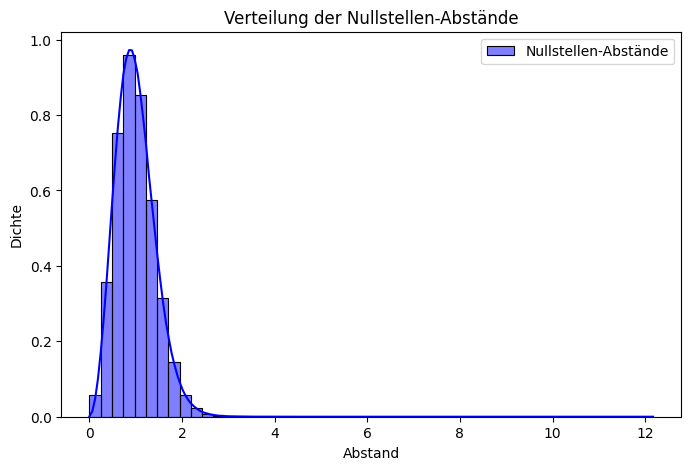

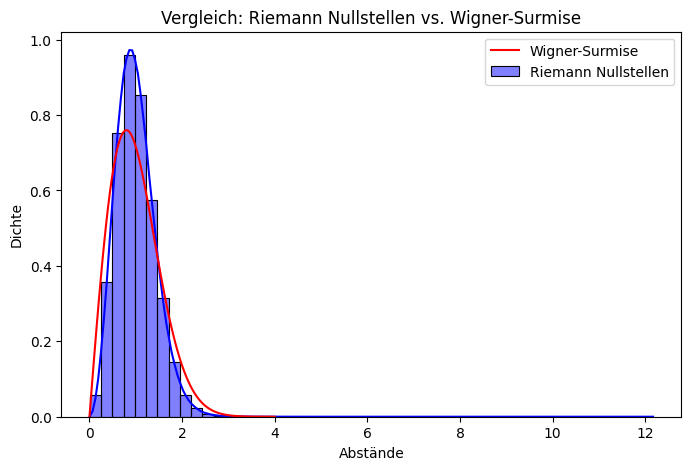

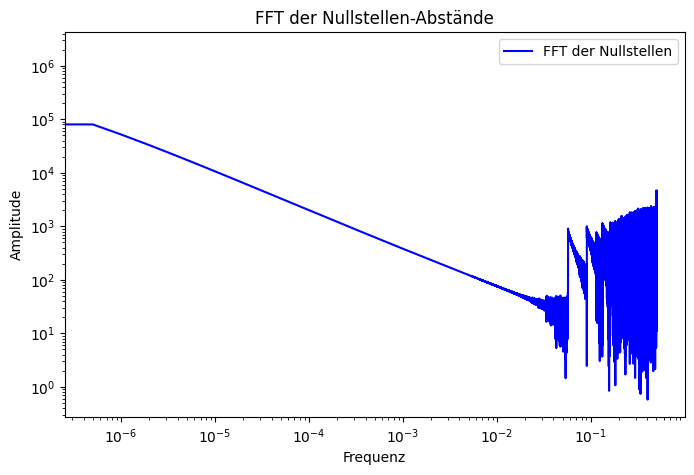

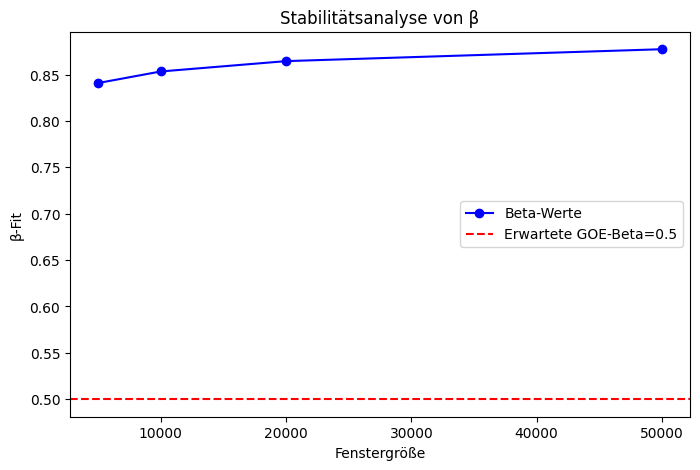

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy.signal
from tqdm import tqdm

# Datei-Pfad anpassen
file_path = "/content/drive/MyDrive/zeros6.txt"

# Nullstellen aus Datei einlesen
def load_zeros(file_path):
    print("Lade Nullstellen...")
    zeros = np.loadtxt(file_path)  # Optimiert für große Dateien
    return zeros

# Berechnung der Nullstellen-Abstände
def compute_spacings(zeros):
    print("Berechne Nullstellen-Abstände...")
    spacings = np.diff(zeros)  # Erste Differenzen berechnen
    return spacings / np.mean(spacings)  # Normalisierung

# Fit für Fibonacci-Freese-Formel (FFF)
def power_law(N, alpha, beta):
    return alpha * N**beta

# Fourier-Analyse der Nullstellen-Abstände
def fourier_analysis(spacings):
    print("Führe Fourier-Analyse durch...")
    fft_values = np.abs(np.fft.rfft(spacings))
    freqs = np.fft.rfftfreq(len(spacings))
    return freqs, fft_values

# Stabilitätsanalyse für Beta
def stability_analysis(N_vals, L_N):
    print("Analysiere Stabilität von Beta...")
    from scipy.optimize import curve_fit

    beta_values = []
    window_sizes = [5000, 10000, 20000, 50000]

    for w in window_sizes:
        popt, _ = curve_fit(power_law, N_vals[:w], L_N[:w])
        beta_values.append(popt[1])

    return window_sizes, beta_values

# Vergleich mit GOE-Wigner-Verteilung
def wigner_surmise(s):
    return (np.pi / 2) * s * np.exp(-np.pi * s**2 / 4)

# Nullstellen laden
zeros = load_zeros(file_path)

# Berechnung der Abstände
spacings = compute_spacings(zeros)

# Fourier-Analyse
freqs, fft_values = fourier_analysis(spacings)

# Stabilitätsanalyse von Beta
N_vals = np.arange(1, len(spacings) + 1)
L_N = np.cumsum(spacings)
window_sizes, beta_values = stability_analysis(N_vals, L_N)

# Histogramm der Nullstellen-Abstände
plt.figure(figsize=(8, 5))
sns.histplot(spacings, bins=50, kde=True, color="blue", stat="density", label="Nullstellen-Abstände")
plt.xlabel("Abstand")
plt.ylabel("Dichte")
plt.legend()
plt.title("Verteilung der Nullstellen-Abstände")
plt.show()

# Vergleich mit GOE-Wigner-Verteilung
s_vals = np.linspace(0, 4, 100)
plt.figure(figsize=(8, 5))
sns.histplot(spacings, bins=50, kde=True, color="blue", stat="density", label="Riemann Nullstellen")
plt.plot(s_vals, wigner_surmise(s_vals), 'r-', label="Wigner-Surmise")
plt.xlabel("Abstände")
plt.ylabel("Dichte")
plt.legend()
plt.title("Vergleich: Riemann Nullstellen vs. Wigner-Surmise")
plt.show()

# Fourier-Analyse plotten
plt.figure(figsize=(8, 5))
plt.plot(freqs, fft_values, 'b-', label="FFT der Nullstellen")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.xscale("log")
plt.yscale("log")
plt.title("FFT der Nullstellen-Abstände")
plt.legend()
plt.show()

# Stabilitätsanalyse plotten
plt.figure(figsize=(8, 5))
plt.plot(window_sizes, beta_values, "bo-", label="Beta-Werte")
plt.axhline(y=0.5, color="r", linestyle="dashed", label="Erwartete GOE-Beta=0.5")
plt.xlabel("Fenstergröße")
plt.ylabel("β-Fit")
plt.title("Stabilitätsanalyse von β")
plt.legend()
plt.show()